We will create 3 different models:
- PD (Probability of Default) - showing a customer not repaying their debt in full or on time.
- LGD (Loss Given Default) - showing the proportion of an exposure a company loses when a customer defaults.
The proportion of the total exposure that cannot be recovered by the lender once a default has occured.
- EAD (Expoosure at Default) - showing the total loss in terms of amount of money the bank is exposed to if a customer defaults.

EL (expected loss) = PD * LGD * EAD 

Estimating expected loss (expected credit loss)

Definition: The amount a lender might lose by lending to a borrower

Capital requirement -- Capital adequacy ratio (CAR):

Capital / Risk-weighted assets (Loans) >= 8%

Basel II Accord:
- Minimum Capital Requirement: How much capital banks need to have
    - Credit risk
    - Operational risk
    - Market risk
- Supervisory Review: How capital is defined
- Market Discipline: How capital is compared against risk-weighted assets

The greater the risk a bank is exposed to, the greater the amount of capital it needs to hold

Basel II Accord prescribes that regulators should allow banks to choose from 3 different approaches for calculating or modeling credit risk (calculating or modeling each of the 3 components of the expected loss):
- standardized approach (SA)
- internal ratings based (IRB) approaches
    - foundation internal ratings based (F-IRB) approach
    - advanced internal ratings based (A-IRB) approach

In this project, we are going to focus on the general case:
Enough data are available for implementing a traditional statistical methodology to build credit risk models.

Loan to value ratio (LTV) : The proportion of the property that is funded by the loan

Return on assets (ROA) = Net income / Total assets
Return on equity (ROE) = Net income / Shareholders' equity
Current ratio = Current assets / Current liabilities
Debt ratio = Total liabilities / Total assets

Application model : is used to estimate a firm's credit rating at the moment of application
The estimated credit ratings are the basis oon which banks decide whether to grant a loan or not, a bank may also use the estimated credit ratings to decide how to price the loan.

Behavioral model: is used to calculate probability of default and respectively expected loss after a loan is granted, banks may also use behavioral models to decide whether to grant an additional loan to an existing customer.


Our goal is to learn how to build statistical models for estimating EL.

In [309]:
# Import Libraries
import pandas as pd
import numpy as np

Data source: https://www.dropbox.com/scl/fi/rzqaawjqwt4qe3rmnnxiw/loan_data_2007_2014.csv?rlkey=a5y6ojznit1ozu8fwt0m7w11w&e=1&dl=0

## Import Data

In [310]:
# Import Data
loan_data_backup = pd.read_csv('/Users/mang/Desktop/applied machine learning/individual assignment/Credit-Risk-Modeling-in-Python/loan_data_2007_2014.csv')
loan_data_backup.head()

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_10429/453420008.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('/Users/mang/Desktop/applied machine learning/individual assignment/Credit-Risk-Modeling-in-Python/loan_data_2007_2014.csv')


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [311]:
loan_data = loan_data_backup.copy()

## Explore Data

In [312]:
pd.options.display.max_columns = None

In [313]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [314]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## General Preprocessing

### Preprocessing few continuous variables

In [315]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [316]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year', '')

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_10429/685063253.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [317]:
type(loan_data['emp_length_int'][0])

str

In [318]:
# transform to numeric
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [319]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [320]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [321]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [322]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [323]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [324]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [325]:
# check 'mths_since_earliest_cr_line' column vlaues which less than 0 (year should be 19xx not 206x)
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [326]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_10429/2332624952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [327]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [328]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [329]:
loan_data['term_int'] = loan_data['term'].str.replace('months', '')

In [330]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [331]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [332]:
loan_data['mths_since_issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [333]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-1') - loan_data['mths_since_issue_d']) / np.timedelta64(1, 'M')))

In [334]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

In [335]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [336]:
pd.get_dummies(loan_data['grade'])

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [337]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [338]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [339]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [340]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [341]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

### Check for missing values and clean

In [342]:
loan_data.isnull()

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
...            ...    ...        ...        ...          ...              ...   
466280       False  False      False      False        False            False   
466281       False  False      False      False        False            False   
466282       False  False      False      False        False            False   
466283       False  False      False      False        False            False   
466284       False  False      False      False        False            False   

         term  int_rate  installment  grade  sub_grade  emp_title  emp_length  \
0       False     False        False  False      False       True       False   
1       False     False        False  False      False      False       False   
2       False     False        False  False      False       True       False   
3       False     False        False  False      False      False       False   
4       False     False        False  False      False      False       False   
...       ...       ...          ...    ...        ...        ...         ...   
466280  False     False        False  False      False      False       False   
466281  False     False        False  False      False      False       False   
466282  False     False        False  False      False      False       False   
466283  False     False        False  False      False      False       False   
466284  False     False        False  False      False       True       False   

        home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0                False       False                False    False        False   
1                False       False                False    False        False   
2                False       False                False    False        False   
3                False       False                False    False        False   
4                False       False                False    False        False   
...                ...         ...                  ...      ...          ...   
466280           False       False                False    False        False   
466281           False       False                False    False        False   
466282           False       False                False    False        False   
466283           False       False                False    False        False   
466284           False       False                False    False        False   

        pymnt_plan    url   desc  purpose  title  zip_code  addr_state    dti  \
0            False  False  False    False  False     False       False  False   
1            False  False  False    False  False     False       False  False   
2            False  False   True    False  False     False       False  False   
3            False  False  False    False  False     False       False  False   
4            False  False  False    False  False     False       False  False   
...            ...    ...    ...      ...    ...       ...         ...    ...   
466280       False  False   True    False  False     False       False  False   
466281       False  False   True    False  False     False       False  False   
466282       False  False  False    False  False     False       False  False   
466283       False  False   True    False  False     False       False  False   
466284       False  False  False    False  False     False       False  False   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0             False             Fal

In [343]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [344]:
pd.options.display.max_rows = 100

In [345]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [346]:
loan_data['annual_inc'].fillna((loan_data['annual_inc']).mean(), inplace = True)

In [347]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

# PD model

## Data Preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [348]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [349]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [350]:
# good 0, bad 1
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (16-30 days)']), 0, 1)

In [351]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

Fine-classing: turning continuous variables into categories, splitting a variable into roughly equal categories according to an internal criteria, such as the values of the variable or the number of cases in each category.

Weight of evidence: shows to what extent an independent variable would predict a dependent variable.

Coarse classing: the process of constructing new categories based on the initial ones, splitting a variable into categories according to an external criteria that show how much the categories explain another variable, such as weight of evidence.

Information value: how much information the original independent variable brings with respect to explaining the dependent variable brings with respect to explaining the dependent variable, is calculated from weight of evidence and the difference of the proportions of two outcomes accross all categories of an original independent variable.

Overfitting: Our statistical model has focused on a particular dataset so much that it has missed the point

Underfitting: The model fails to capture the underlying logic of the data

##### Splitting Data

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 74498        74498   8117272    9859296      17000        17000   
 428402      428402  12567361   14579539      15000        15000   
 169967      169967   3163894    3876580      10000        10000   
 63195        63195   8814798   10586949       5000         5000   
 173095      173095   3106835    3779252       3000         3000   
 ...            ...       ...        ...        ...          ...   
 49337        49337   9875185   11727252       9750         9750   
 275144      275144  28653759   31186939      15000        15000   
 455326      455326  10695718   12587823       7500         7500   
 117680      117680   5630652    7013126      21000        21000   
 88704        88704   7365486    9027595      21850        21850   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 74498           17000.0   60 months     23.70       486.10     F        F1   
 428402          15000.0

In [354]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size=0.2, random_state=42)

## Data Preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [355]:
# df_inputs_prepr = loan_data_inputs_train
# df_targets_prepr = loan_data_targets_train


In [464]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [465]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [466]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)
df1.head()

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1

In [467]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [468]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.965714
1     B  0.931211
2     C  0.896040
3     D  0.863938
4     E  0.829531
5     F  0.799555
6     G  0.729042

In [469]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()],
                axis=1)
df1

grade  good_bad grade  good_bad
0     A     15108     A  0.965714
1     B     27199     B  0.931211
2     C     25048     C  0.896040
3     D     15390     D  0.863938
4     E      7145     E  0.829531
5     F      2699     F  0.799555
6     G       668     G  0.729042

In [470]:
df1 = df1.iloc[:, [0, 1, 3]]
df1

grade  good_bad  good_bad
0     A     15108  0.965714
1     B     27199  0.931211
2     C     25048  0.896040
3     D     15390  0.863938
4     E      7145  0.829531
5     F      2699  0.799555
6     G       668  0.729042

In [471]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade  n_obs  prop_good
0     A  15108   0.965714
1     B  27199   0.931211
2     C  25048   0.896040
3     D  15390   0.863938
4     E   7145   0.829531
5     F   2699   0.799555
6     G    668   0.729042

In [472]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

grade  n_obs  prop_good  prop_n_obs
0     A  15108   0.965714    0.162004
1     B  27199   0.931211    0.291656
2     C  25048   0.896040    0.268591
3     D  15390   0.863938    0.165028
4     E   7145   0.829531    0.076616
5     F   2699   0.799555    0.028942
6     G    668   0.729042    0.007163

In [473]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108   0.965714    0.162004  14590.0   518.0
1     B  27199   0.931211    0.291656  25328.0  1871.0
2     C  25048   0.896040    0.268591  22444.0  2604.0
3     D  15390   0.863938    0.165028  13296.0  2094.0
4     E   7145   0.829531    0.076616   5927.0  1218.0
5     F   2699   0.799555    0.028942   2158.0   541.0
6     G    668   0.729042    0.007163    487.0   181.0

In [474]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
1     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
2     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
5     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad  
0    0.057383  
1    0.207267  
2    0.288468  
3    0.231971  
4    0.134929  
5    0.059931  
6    0.020051

In [475]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
1     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
2     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
5     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad       WoE  
0    0.057383  1.104785  
1    0.207267  0.372106  
2    0.288468 -0.079356  
3    0.231971 -0.384944  
4    0.134929 -0.651023  
5    0.059931 -0.849813  
6    0.020051 -1.243564

In [476]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.729042    0.007163    487.0   181.0     0.005782   
1     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
2     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
5     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
6     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   

   prop_n_bad       WoE  
0    0.020051 -1.243564  
1    0.059931 -0.849813  
2    0.134929 -0.651023  
3    0.231971 -0.384944  
4    0.288468 -0.079356  
5    0.207267  0.372106  
6    0.057383  1.104785

In [477]:
# calculate the differences in the proportion of good loans between two subsequent categories and the difference of weight of evidence between two subsequent categories.
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.729042    0.007163    487.0   181.0     0.005782   
1     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
2     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
5     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
6     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.020051 -1.243564             NaN       NaN  
1    0.059931 -0.849813        0.070513  0.393751  
2    0.134929 -0.651023        0.029976  0.198790  
3    0.231971 -0.384944        0.034406  0.266079  
4    0.288468 -0.079356        0.032102  0.305587  
5    0.207267  0.372106        0.035171  0.451463  
6    0.057383  1.104785        0.034503  0.732679

In [478]:
# information value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.729042    0.007163    487.0   181.0     0.005782   
1     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
2     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
5     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
6     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.020051 -1.243564             NaN       NaN  0.281949  
1    0.059931 -0.849813        0.070513  0.393751  0.281949  
2    0.134929 -0.651023        0.029976  0.198790  0.281949  
3    0.231971 -0.384944        0.034406  0.266079  0.281949  
4    0.288468 -0.079356        0.032102  0.305587  0.281949  
5    0.207267  0.372106        0.035171  0.451463  0.281949  
6    0.057383  1.104785        0.034503  0.732679  0.281949

### Preprocessing discrete variables: automating calculations

In [479]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
    

In [480]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.729042    0.007163    487.0   181.0     0.005782   
1     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
2     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
5     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
6     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.020051 -1.243564             NaN       NaN  0.281949  
1    0.059931 -0.849813        0.070513  0.393751  0.281949  
2    0.134929 -0.651023        0.029976  0.198790  0.281949  
3    0.231971 -0.384944        0.034406  0.266079  0.281949  
4    0.288468 -0.079356        0.032102  0.305587  0.281949  
5    0.207267  0.372106        0.035171  0.451463  0.281949  
6    0.057383  1.104785        0.034503  0.732679  0.281949

### Preprocessing Discrete Variables: Visualizing Results

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [482]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):  # set default value 0, by default, the label should be displayed horizontally
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ') + df_WoE.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

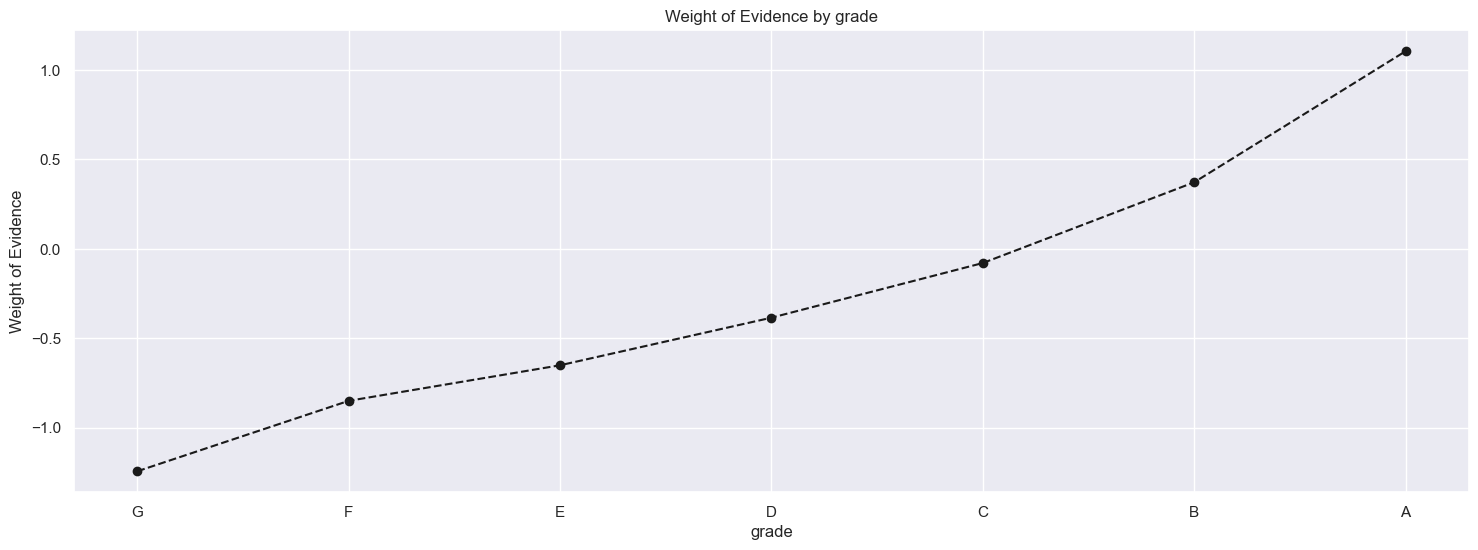

In [483]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [484]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45   0.777778    0.000483     35.0    10.0     0.000416   
1           NONE     10   0.800000    0.000107      8.0     2.0     0.000095   
2           RENT  37874   0.887944    0.406125  33630.0  4244.0     0.399264   
3            OWN   8409   0.901891    0.090170   7584.0   825.0     0.090039   
4       MORTGAGE  46919   0.915898    0.503115  42973.0  3946.0     0.510186   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.001108 -0.980568             NaN       NaN  0.023679  
1    0.000222 -0.847037        0.022222  0.133531  0.023679  
2    0.470145 -0.163419        0.087944  0.683618  0.023679  
3    0.091392 -0.014918        0.013947  0.148500  0.023679  
4    0.437133  0.154539        0.014007  0.169457  0.023679

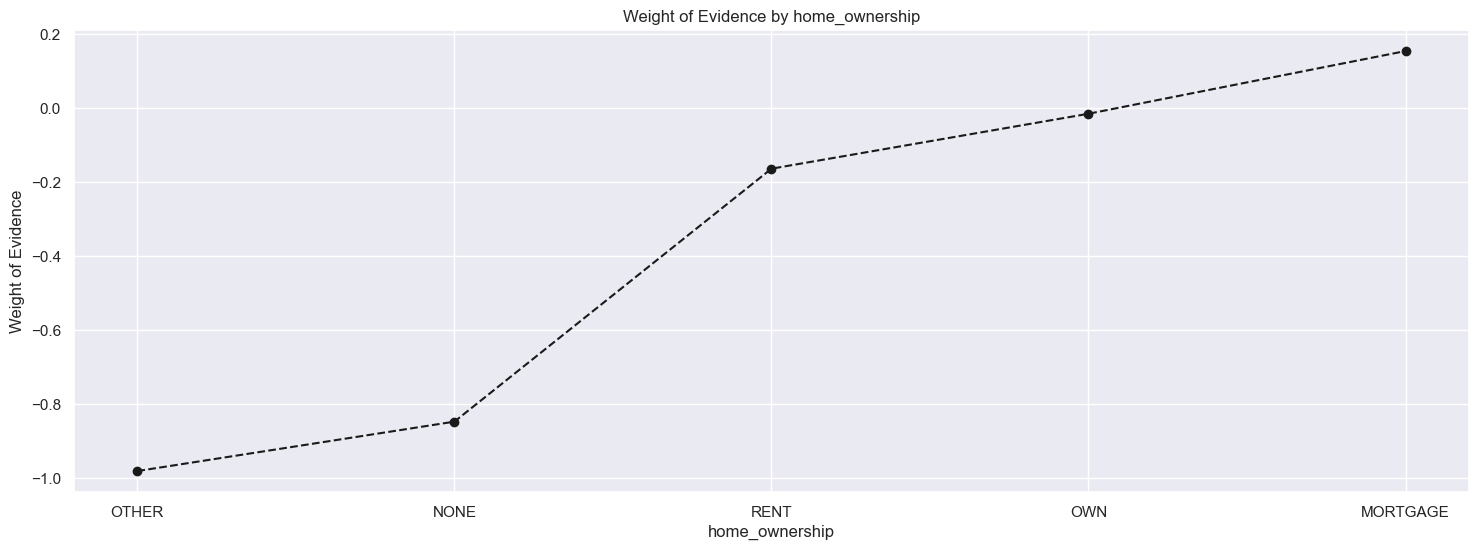

In [485]:
plot_by_woe(df_temp)

The categories 'OTHER' and 'NONE' are associated with the highest probability of default (There are very few loans associated with these categories, less than 0.1% each, check 'prop_n_obs' column in df_temp). 'ANY' has only one observation.

In these cases, we combine such underrepresented categories that are similar to them.

Let's combine 'OTHER', 'NONE' and 'ANY' with the riskiest category with enough number of observations - 'RENT'.

Borrowers with category 'OWN' have a considerably higher weight of evidence than the ones with category 'RENT', so these two categories will be in two different dummy variables.

The 'MORTGAGE' category encompasses about half of all borrowers. Hence, it will be in a separate dummy variable.

In sum, 3 categories: ('OTHER', 'NONE', 'ANY' and 'RENT), 'OWN', 'MORTGAGE'.

In [486]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:ANY'], df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:OTHER']])

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [487]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [488]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          ID      2   0.500000    0.000021      1.0     1.0     0.000012   
1          NV   1298   0.875963    0.013919   1137.0   161.0     0.013499   
2          HI    486   0.882716    0.005211    429.0    57.0     0.005093   
3          FL   6426   0.883598    0.068906   5678.0   748.0     0.067411   
4          AL   1182   0.884095    0.012675   1045.0   137.0     0.012407   
5          DE    208   0.884615    0.002230    184.0    24.0     0.002184   
6          NJ   3676   0.884657    0.039418   3252.0   424.0     0.038609   
7          LA   1130   0.885841    0.012117   1001.0   129.0     0.011884   
8          NY   8031   0.894658    0.086117   7185.0   846.0     0.085302   
9          RI    403   0.895782    0.004321    361.0    42.0     0.004286   
10         MI   2358   0.896098    0.025285   2113.0   245.0     0.025086   
11         MO   1491   0.896714    0.015988   1337.0   154.0     0.015873   
12         MD   2203   0.897413    0.023623   1977.0   226.0     0.023471   
13         NC   2478   0.898709    0.026572   2227.0   251.0     0.026440   
14         PA   3334   0.898920    0.035751   2997.0   337.0     0.035581   
15         AR    728   0.899725    0.007806    655.0    73.0     0.007776   
16         AZ   2067   0.899855    0.022165   1860.0   207.0     0.022082   
17         CA  14251   0.901761    0.152814  12851.0  1400.0     0.152570   
18         WA   2145   0.902098    0.023001   1935.0   210.0     0.022973   
19         MA   2214   0.904697    0.023741   2003.0   211.0     0.023780   
20         NH    402   0.905473    0.004311    364.0    38.0     0.004322   
21         IN   1315   0.905703    0.014101   1191.0   124.0     0.014140   
22         OK    833   0.906363    0.008932    755.0    78.0     0.008964   
23         OH   3102   0.906512    0.033263   2812.0   290.0     0.033385   
24         UT    672   0.909226    0.007206    611.0    61.0     0.007254   
25         GA   3015   0.909453    0.032330   2742.0   273.0     0.032554   
26         WI   1171   0.909479    0.012557   1065.0   106.0     0.012644   
27         SD    179   0.910615    0.001919    163.0    16.0     0.001935   
28         VA   2856   0.911415    0.030625   2603.0   253.0     0.030903   
29         MN   1632   0.911765    0.017500   1488.0   144.0     0.017666   
30         NM    513   0.912281    0.005501    468.0    45.0     0.005556   
31         OR   1135   0.912775    0.012171   1036.0    99.0     0.012300   
32         CO   1916   0.916493    0.020545   1756.0   160.0     0.020848   
33         KY    851   0.916569    0.009125    780.0    71.0     0.009260   
34         TX   7281   0.918006    0.078075   6684.0   597.0     0.079354   
35         IL   3779   0.919820    0.040522   3476.0   303.0     0.041268   
36         SC   1135   0.920705    0.012171   1045.0    90.0     0.012407   
37         CT   1429   0.920924    0.015323   1316.0   113.0     0.015624   
38         TN   1139   0.920983    0.012214   1049.0    90.0     0.012454   
39         VT    178   0.921348    0.001909    164.0    14.0     0.001947   
40         MS    246   0.922764    0.002638    227.0    19.0     0.002695   
41         KS    830   0.926506    0.008900    769.0    61.0     0.009130   
42         AK    248   0.927419    0.002659    230.0    18.0     0.002731   
43         WV    486   0.927984    0.005211    451.0    35.0     0.005354   
44         WY    209   0.933014    0.002241    195.0    14.0     0.002315   
45         DC    297   0.939394    0.003185    279.0    18.0     0.003312   
46         MT    293   0.952218    0.003142    279.0    14.0     0.003312   
47         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
48         IA      1   1.000000    0.000011      1.0     0.0     0.000012   
49         NE      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000111 -2

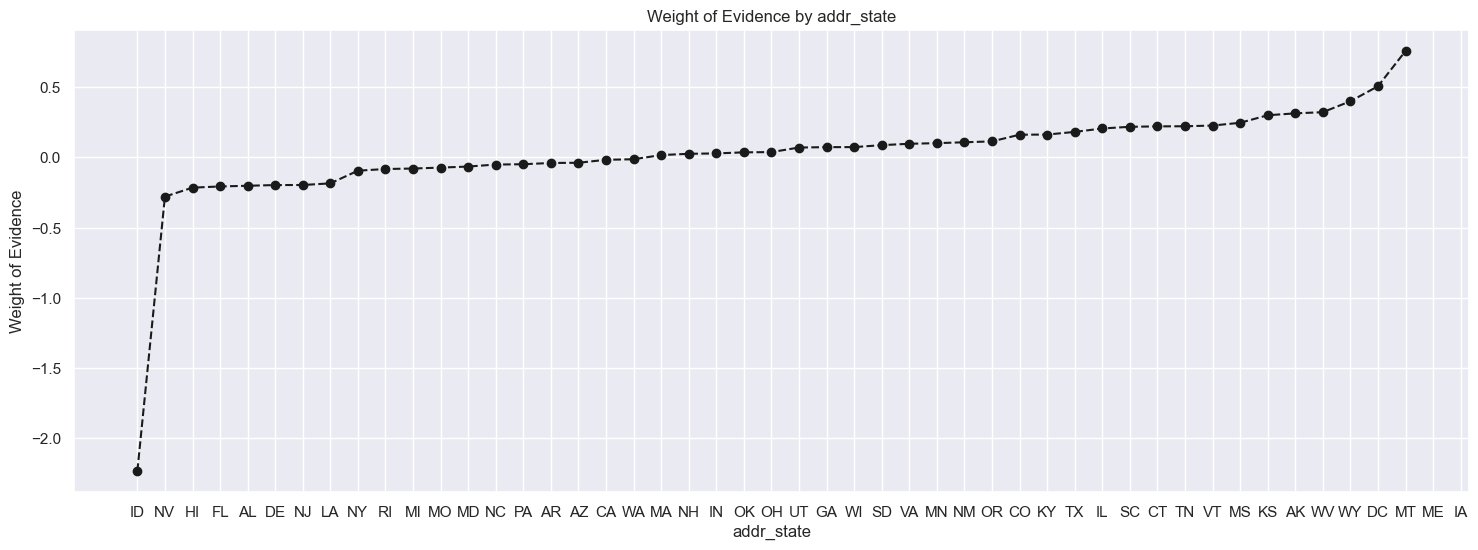

In [489]:
plot_by_woe(df_temp)

The missing state is North Dakota(ND).

In [490]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

From the plot, we can see that there are 2 states, Nebraska and Lowa, with a considerably lower weight of evidence compared too most states.

There are also 2 states with a considerably higher weight of evidence, Maine(ME) and Idaho(ID). Note that weight of evidence for the last state could not be calculated because there are no bad borrowers.

The other 46 categories appear to have very similar weight of evidence values compared to these three.

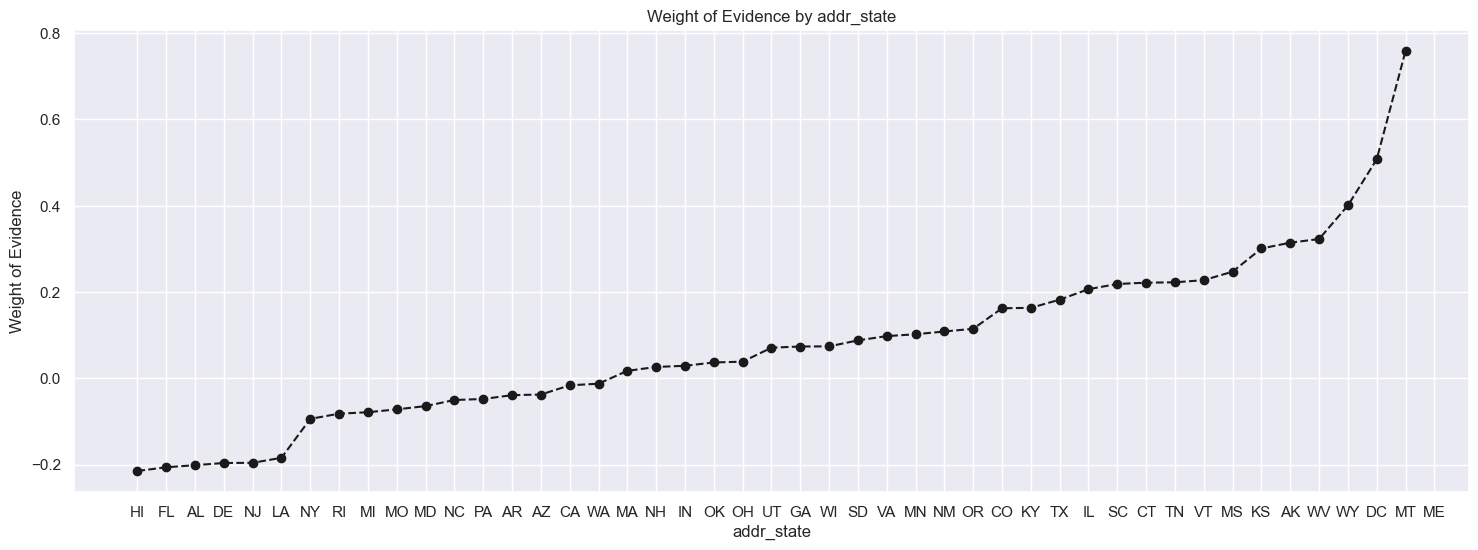

In [491]:
plot_by_woe(df_temp.iloc[2: -2, :])

We place the state we have no information about in the WORST (highest risk) category.
Our first dummy will include the first six states from results table, from NE to AL, plus NE. (NE, IA, ND, NV, FL, HI, AL)
The last 4 states displayed on the chart can be grouped together in one category based on their rather low number of observations, plus ME and ID. (WV, NH, WY, DC, ME, ID)

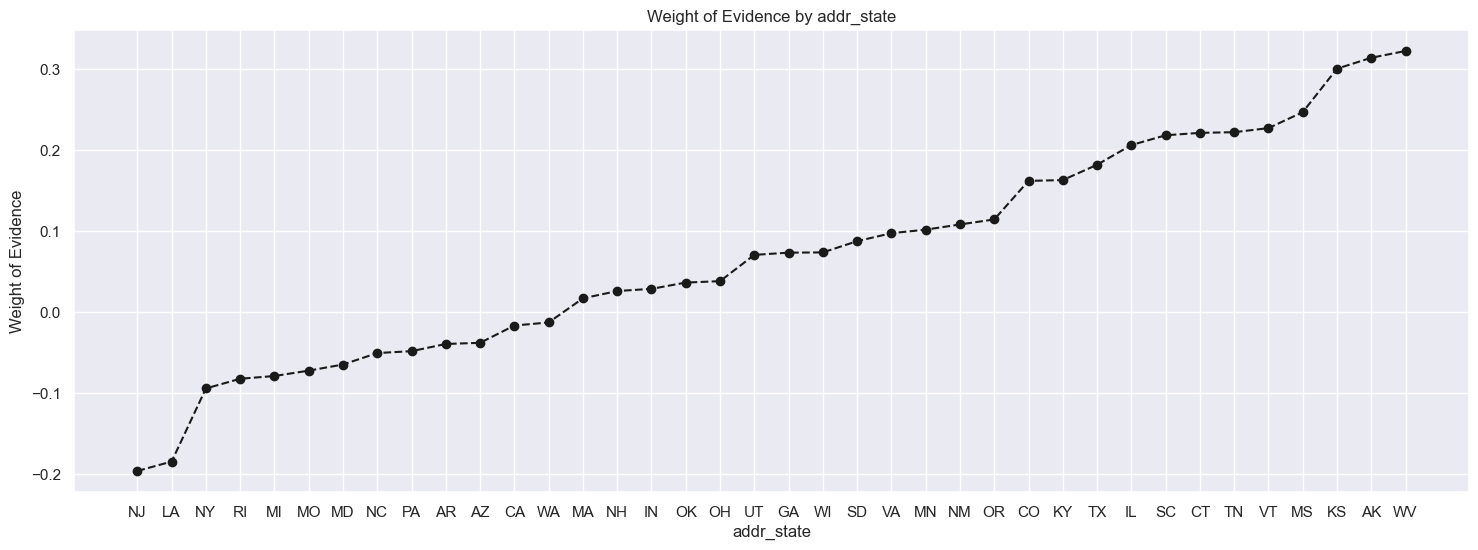

In [492]:
# the remaining 38 states
plot_by_woe(df_temp.iloc[6: -6, :])

NY and CA stand out with a particularly high number of borrowers, especially CA, so they to be in a separate dummy variable by itself. The rest of the states can either be all in one group or in several groups, depending on the increase in weight of evidence and separated by NY and CA in the plot. 

In [493]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [494]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.885616    0.360734  29793.0  3848.0   
1     Source Verified  29963   0.910990    0.321295  27296.0  2667.0   
2        Not Verified  29653   0.915287    0.317971  27141.0  2512.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.353710    0.426277 -0.186611             NaN       NaN  0.022632  
1     0.324065    0.295447  0.092455        0.025374  0.279066  0.022632  
2     0.322225    0.278276  0.146635        0.004297  0.054180  0.022632

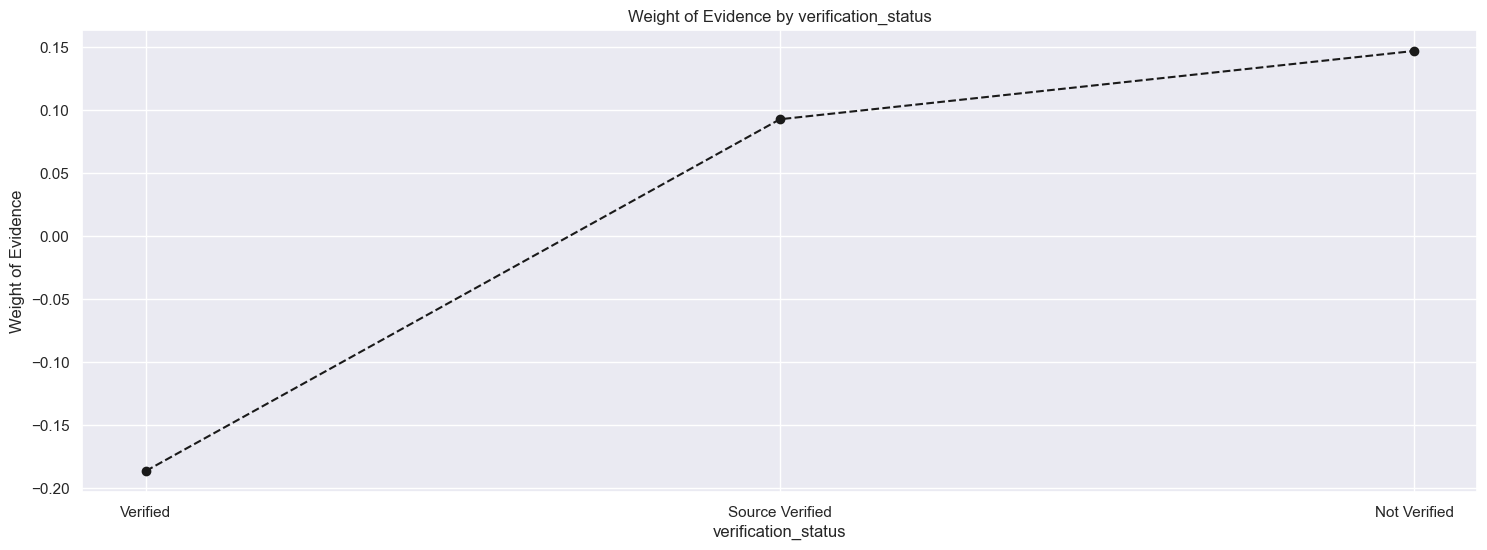

In [495]:
plot_by_woe(df_temp)

In [496]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0          educational     89   0.752809    0.000954     67.0    22.0   
1     renewable_energy     70   0.771429    0.000751     54.0    16.0   
2       small_business   1431   0.789658    0.015345   1130.0   301.0   
3              medical    918   0.863834    0.009844    793.0   125.0   
4                house    439   0.870159    0.004707    382.0    57.0   
5                other   4806   0.872243    0.051535   4192.0   614.0   
6              wedding    456   0.875000    0.004890    399.0    57.0   
7             vacation    496   0.885081    0.005319    439.0    57.0   
8               moving    602   0.885382    0.006455    533.0    69.0   
9   debt_consolidation  55012   0.899676    0.589897  49493.0  5519.0   
10      major_purchase   1991   0.910598    0.021350   1813.0   178.0   
11    home_improvement   5299   0.917532    0.056821   4862.0   437.0   
12                 car   1072   0.925373    0.011495    992.0    80.0   
13         credit_card  20576   0.927343    0.220638  19081.0  1495.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000795    0.002437 -1.119681             NaN       NaN  0.052699  
1      0.000641    0.001772 -1.016936        0.018620  0.102745  0.052699  
2      0.013416    0.033344 -0.910468        0.018229  0.106467  0.052699  
3      0.009415    0.013847 -0.385822        0.074177  0.524647  0.052699  
4      0.004535    0.006314 -0.330962        0.006325  0.054860  0.052699  
5      0.049768    0.068018 -0.312393        0.002084  0.018569  0.052699  
6      0.004737    0.006314 -0.287421        0.002757  0.024972  0.052699  
7      0.005212    0.006314 -0.191883        0.010081  0.095538  0.052699  
8      0.006328    0.007644 -0.188916        0.000301  0.002967  0.052699  
9      0.587593    0.611388 -0.039697        0.014294  0.149220  0.052699  
10     0.021524    0.019719  0.087624        0.010921  0.127320  0.052699  
11     0.057723    0.048410  0.175941        0.006934  0.088317  0.052699  
12     0.011777    0.008862  0.284365        0.007842  0.108425  0.052699  
13     0.226534    0.165614  0.313236        0.001969  0.028870  0.052699

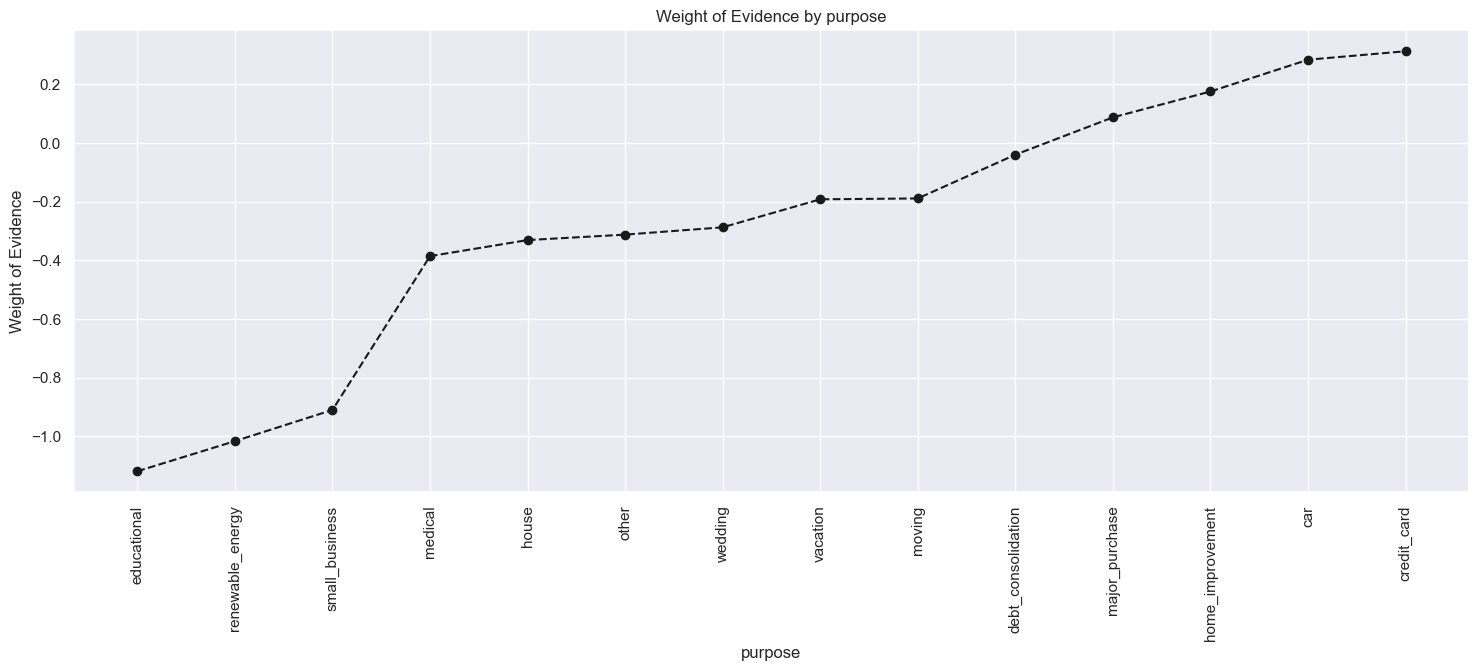

In [497]:
plot_by_woe(df_temp, 90)

In [498]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [499]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.890992    0.648648  53897.0  6594.0   
1                   w  32766   0.925746    0.351352  30333.0  2433.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.639879    0.730475 -0.132416             NaN       NaN  0.038249  
1     0.360121    0.269525  0.289780        0.034754  0.422196  0.038249

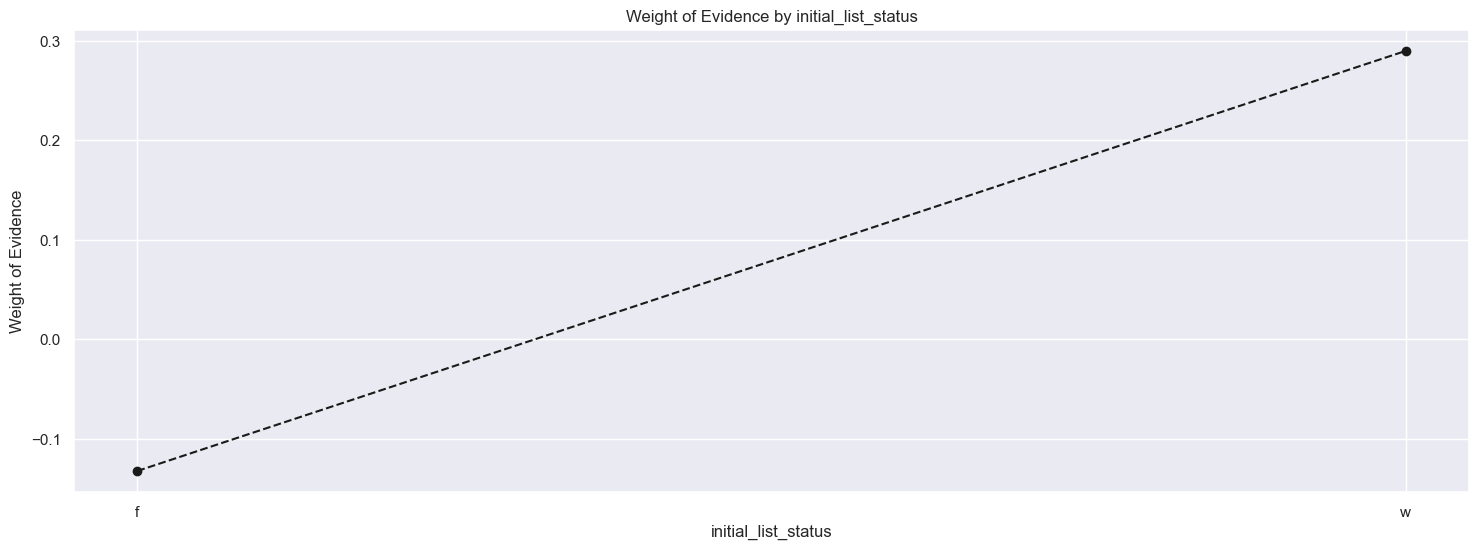

In [500]:
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [501]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [502]:
# term
df_inputs_prepr['term_int'].unique()

array([60, 36])

In [503]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  67534   0.912711    0.724171  61639.0  5895.0     0.731794   
1        60  25723   0.878241    0.275829  22591.0  3132.0     0.268206   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.653041  0.113859             NaN       NaN  0.029242  
1    0.346959 -0.257451        0.034469   0.37131  0.029242

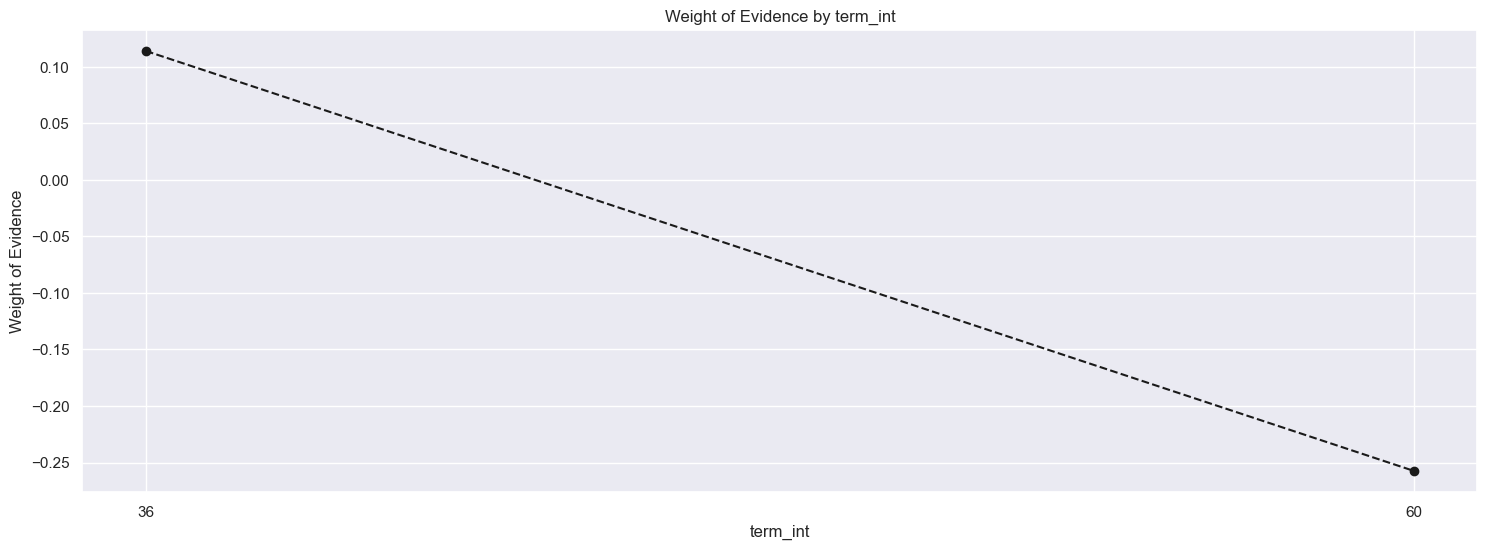

In [504]:
plot_by_woe(df_temp)

In [505]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [506]:
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [507]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  11553   0.889726    0.123883  10279.0  1274.0   
1              1.0   5968   0.905664    0.063995   5405.0   563.0   
2              2.0   8295   0.900422    0.088948   7469.0   826.0   
3              3.0   7391   0.900961    0.079254   6659.0   732.0   
4              4.0   5555   0.903510    0.059567   5019.0   536.0   
5              5.0   6172   0.896792    0.066183   5535.0   637.0   
6              6.0   5225   0.891675    0.056028   4659.0   566.0   
7              7.0   5131   0.903333    0.055020   4635.0   496.0   
8              8.0   4542   0.902026    0.048704   4097.0   445.0   
9              9.0   3621   0.902513    0.038828   3268.0   353.0   
10            10.0  29804   0.912797    0.319590  27205.0  2599.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.122035    0.141132 -0.145390             NaN       NaN  0.008283  
1      0.064170    0.062368  0.028469        0.015938  0.173859  0.008283  
2      0.088674    0.091503 -0.031409        0.005242  0.059878  0.008283  
3      0.079057    0.081090 -0.025387        0.000539  0.006022  0.008283  
4      0.059587    0.059377  0.003521        0.002550  0.028908  0.008283  
5      0.065713    0.070566 -0.071254        0.006718  0.074775  0.008283  
6      0.055313    0.062701 -0.125369        0.005117  0.054115  0.008283  
7      0.055028    0.054946  0.001484        0.011658  0.126854  0.008283  
8      0.048641    0.049297 -0.013395        0.001307  0.014880  0.008283  
9      0.038799    0.039105 -0.007866        0.000488  0.005529  0.008283  
10     0.322985    0.287914  0.114943        0.010284  0.122809  0.008283

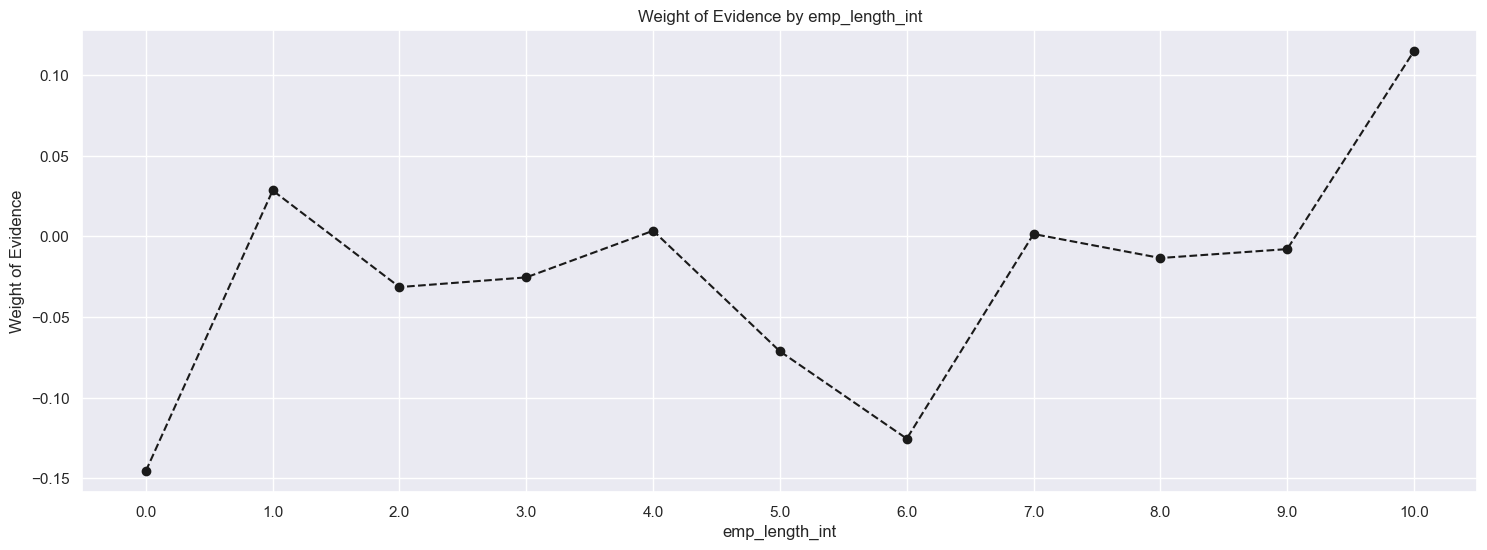

In [508]:
plot_by_woe(df_temp)

In [509]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [510]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [511]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [512]:
df_inputs_prepr['mths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [513]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0              (35.91, 37.8]   7191   0.960645    0.077109  6908.0  283.0   
1               (37.8, 39.6]   9752   0.948113    0.104571  9246.0  506.0   
2               (39.6, 41.4]   9506   0.935199    0.101933  8890.0  616.0   
3               (41.4, 43.2]   7240   0.928591    0.077635  6723.0  517.0   
4               (43.2, 45.0]   7217   0.919219    0.077388  6634.0  583.0   
5               (45.0, 46.8]   3104   0.909472    0.033284  2823.0  281.0   
6               (46.8, 48.6]   6197   0.907859    0.066451  5626.0  571.0   
7               (48.6, 50.4]   5821   0.903625    0.062419  5260.0  561.0   
8               (50.4, 52.2]   5021   0.890460    0.053840  4471.0  550.0   
9               (52.2, 54.0]   4497   0.880142    0.048222  3958.0  539.0   
10              (54.0, 55.8]   2064   0.877907    0.022132  1812.0  252.0   
11              (55.8, 57.6]   3572   0.870381    0.038303  3109.0  463.0   
12              (57.6, 59.4]   2904   0.859504    0.031140  2496.0  408.0   
13              (59.4, 61.2]   2474   0.857720    0.026529  2122.0  352.0   
14              (61.2, 63.0]   2539   0.855849    0.027226  2173.0  366.0   
15              (63.0, 64.8]   1115   0.841256    0.011956   938.0  177.0   
16              (64.8, 66.6]   1721   0.819872    0.018454  1411.0  310.0   
17              (66.6, 68.4]   1296   0.852623    0.013897  1105.0  191.0   
18              (68.4, 70.2]   1097   0.840474    0.011763   922.0  175.0   
19              (70.2, 72.0]   1001   0.818182    0.010734   819.0  182.0   
20              (72.0, 73.8]    447   0.834452    0.004793   373.0   74.0   
21              (73.8, 75.6]    790   0.853165    0.008471   674.0  116.0   
22              (75.6, 77.4]    754   0.874005    0.008085   659.0   95.0   
23              (77.4, 79.2]    690   0.846377    0.007399   584.0  106.0   
24              (79.2, 81.0]    599   0.876461    0.006423   525.0   74.0   
25              (81.0, 82.8]    254   0.870079    0.002724   221.0   33.0   
26              (82.8, 84.6]    533   0.878049    0.005715   468.0   65.0   
27              (84.6, 86.4]    459   0.838780    0.004922   385.0   74.0   
28              (86.4, 88.2]    443   0.866817    0.004750   384.0   59.0   
29              (88.2, 90.0]    439   0.863326    0.004707   379.0   60.0   
30              (90.0, 91.8]    194   0.835052    0.002080   162.0   32.0   
31              (91.8, 93.6]    367   0.896458    0.003935   329.0   38.0   
32              (93.6, 95.4]    257   0.879377    0.002756   226.0   31.0   
33              (95.4, 97.2]    276   0.836957    0.002960   231.0   45.0   
34              (97.2, 99.0]    234   0.829060    0.002509   194.0   40.0   
35             (99.0, 100.8]    100   0.920000    0.001072    92.0    8.0   
36            (100.8, 102.6]    170   0.835294    0.001823   142.0   28.0   
37            (102.6, 104.4]    150   0.873333    0.001608   131.0   19.0   
38            (104.4, 106.2]    129   0.868217    0.001383   112.0   17.0   
39            (106.2, 108.0]    119   0.815126    0.001276    97.0   22.0   
40            (108.0, 109.8]     36   0.861111    0.000386    31.0    5.0   
41            (109.8, 111.6]     40   0.800000    0.000429    32.0    8.0   
42            (111.6, 113.4]     37   0.972973    0.000397    36.0    1.0   
43            (113.4, 115.2]     57   0.824561    0.000611    47.0   10.0   
44            (115.2, 117.0]    131   0.801527    0.001405   105.0   26.0   
45            (117.0, 118.8]     59   0.813559    0.000633    48.0   11.0   
46            (118.8, 120.6]     83   0.734940    0.000890    61.0   22.0   
47            (120.6, 122.4]     41   0.609756    0.000440    25.0   16.0   
48            (122.4, 124.2]     23   0.695652    0.000247    16.0    7.0   
49            (124.2, 126.0]     17   0.882353    0.000182    15.0    2.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  


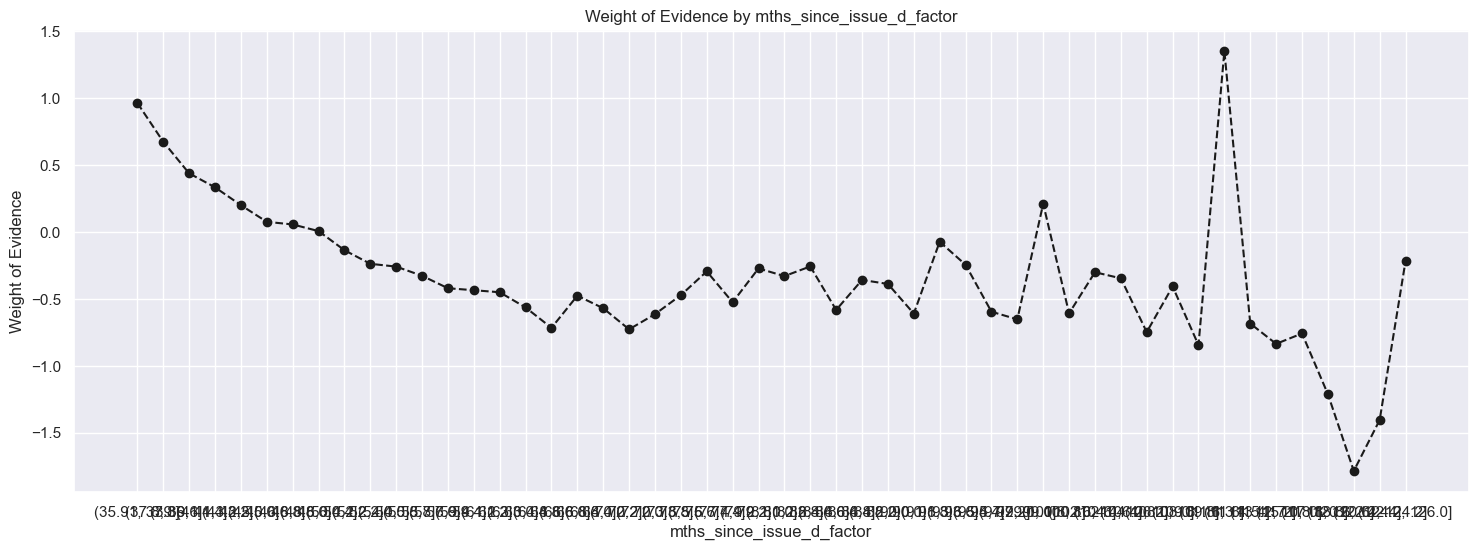

In [514]:
plot_by_woe(df_temp)

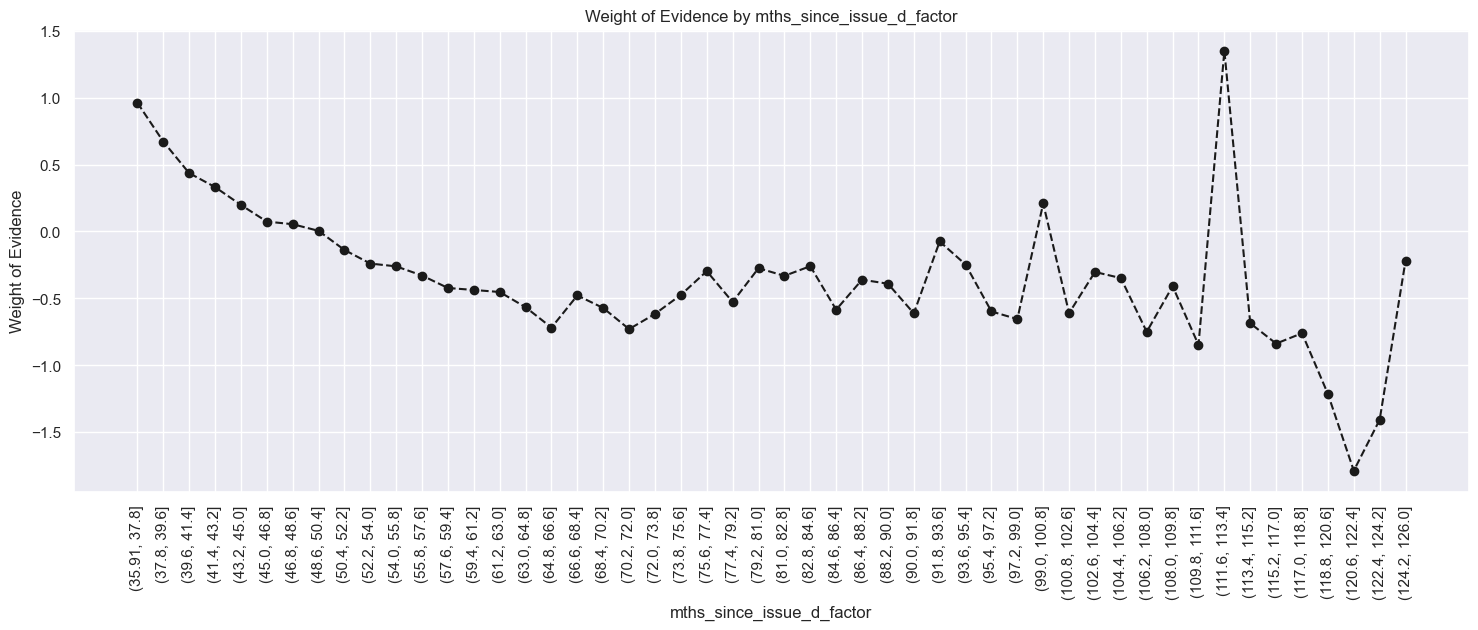

In [515]:
plot_by_woe(df_temp, 90)

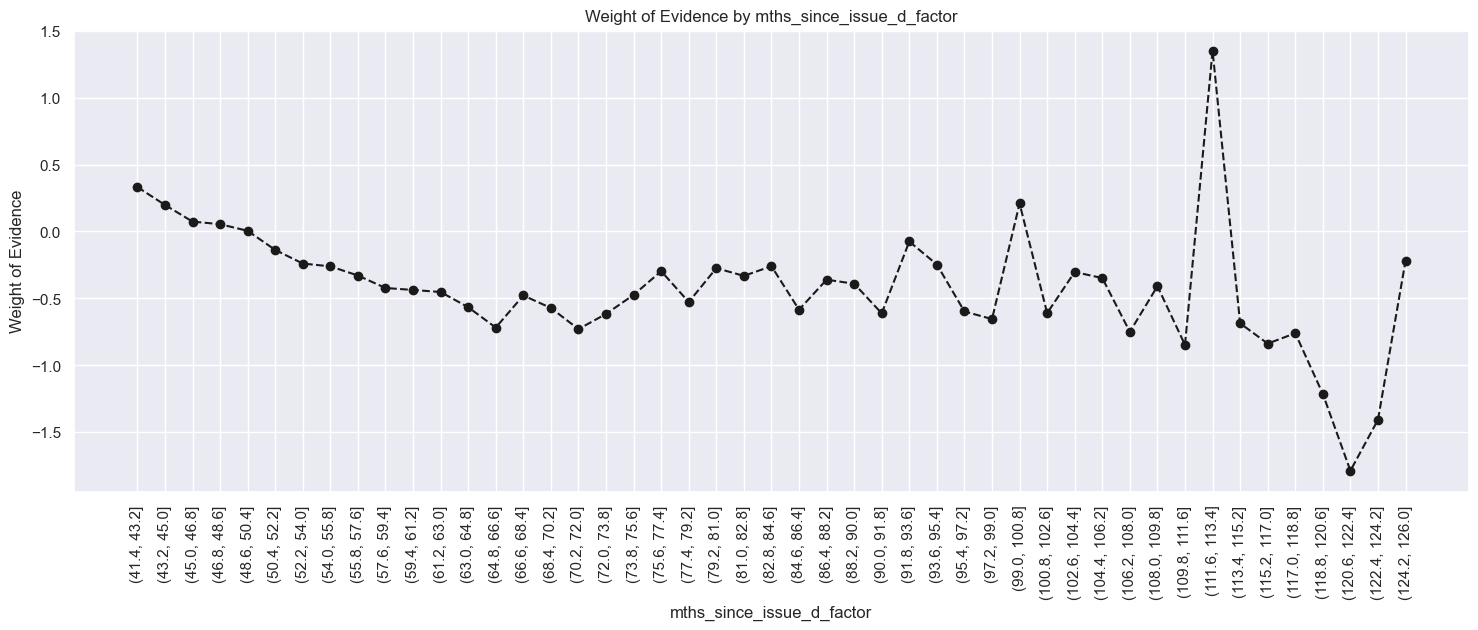

In [516]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [517]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [518]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [519]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.980345    0.022368  2045.0   41.0   
2     (6.246, 6.658]   1974   0.975177    0.021167  1925.0   49.0   
3     (6.658, 7.071]    477   0.949686    0.005115   453.0   24.0   
4     (7.071, 7.484]    804   0.983831    0.008621   791.0   13.0   
5     (7.484, 7.897]   3245   0.968259    0.034796  3142.0  103.0   
6      (7.897, 8.31]   2429   0.955537    0.026046  2321.0  108.0   
7      (8.31, 8.722]   1680   0.970833    0.018015  1631.0   49.0   
8     (8.722, 9.135]   2384   0.947567    0.025564  2259.0  125.0   
9     (9.135, 9.548]   1590   0.983648    0.017050  1564.0   26.0   
10    (9.548, 9.961]   1881   0.933014    0.020170  1755.0  126.0   
11   (9.961, 10.374]   2766   0.943601    0.029660  2610.0  156.0   
12  (10.374, 10.786]   1390   0.923741    0.014905  1284.0  106.0   
13  (10.786, 11.199]   4464   0.947357    0.047868  4229.0  235.0   
14  (11.199, 11.612]   1213   0.922506    0.013007  1119.0   94.0   
15  (11.612, 12.025]   3737   0.942467    0.040072  3522.0  215.0   
16  (12.025, 12.438]   3077   0.909327    0.032995  2798.0  279.0   
17   (12.438, 12.85]   2754   0.932825    0.029531  2569.0  185.0   
18   (12.85, 13.263]   5440   0.913971    0.058333  4972.0  468.0   
19  (13.263, 13.676]   3806   0.913032    0.040812  3475.0  331.0   
20  (13.676, 14.089]   2692   0.907875    0.028866  2444.0  248.0   
21  (14.089, 14.502]   5760   0.898090    0.061765  5173.0  587.0   
22  (14.502, 14.914]   1187   0.877843    0.012728  1042.0  145.0   
23  (14.914, 15.327]   4811   0.892954    0.051589  4296.0  515.0   
24   (15.327, 15.74]   3146   0.907184    0.033735  2854.0  292.0   
25   (15.74, 16.153]   1869   0.846442    0.020041  1582.0  287.0   
26  (16.153, 16.566]   3230   0.868111    0.034635  2804.0  426.0   
27  (16.566, 16.978]   1035   0.868599    0.011098   899.0  136.0   
28  (16.978, 17.391]   2843   0.873373    0.030486  2483.0  360.0   
29  (17.391, 17.804]   2992   0.852607    0.032083  2551.0  441.0   
30  (17.804, 18.217]    286   0.849650    0.003067   243.0   43.0   
31   (18.217, 18.63]   2729   0.847930    0.029263  2314.0  415.0   
32   (18.63, 19.042]   1835   0.840872    0.019677  1543.0  292.0   
33  (19.042, 19.455]   1135   0.811454    0.012171   921.0  214.0   
34  (19.455, 19.868]   1680   0.845238    0.018015  1420.0  260.0   
35  (19.868, 20.281]   1244   0.872186    0.013339  1085.0  159.0   
36  (20.281, 20.694]    805   0.827329    0.008632   666.0  139.0   
37  (20.694, 21.106]    956   0.813808    0.010251   778.0  178.0   
38  (21.106, 21.519]    701   0.774608    0.007517   543.0  158.0   
39  (21.519, 21.932]    222   0.792793    0.002381   176.0   46.0   
40  (21.932, 22.345]    832   0.802885    0.008922   668.0  164.0   
41  (22.345, 22.758]    586   0.776451    0.006284   455.0  131.0   
42   (22.758, 23.17]    375   0.762667    0.004021   286.0   89.0   
43   (23.17, 23.583]    655   0.804580    0.007024   527.0  128.0   
44  (23.583, 23.996]    408   0.762255    0.004375   311.0   97.0   
45  (23.996, 24.409]    393   0.867684    0.004214   341.0   52.0   
46  (24.409, 24.822]    436   0.814220    0.004675   355.0   81.0   
47  (24.822, 25.234]    351   0.831909    0.003764   292.0   59.0   
48  (25.234, 25.647]    194   0.793814    0.002080   154.0   40.0   
49   (25.647, 26.06]    474   0.776371    0.005083   368.0  106.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002279    0.000665  1.232405             NaN       NaN  0.364404  
1      0.024279    0.004542  1.676250        0.010648  0.443845  0.364404  
2      0.022854    0.005428  1.437530        0.005168  0.238720  0.364404  
3      0.005378    0.002659  0.704507        0.025492  0.733023  0.364404  
4      0.009391    0.001440  1.875018        0.034145  1.170510  0.364404  
5      0.037303    0.011410  

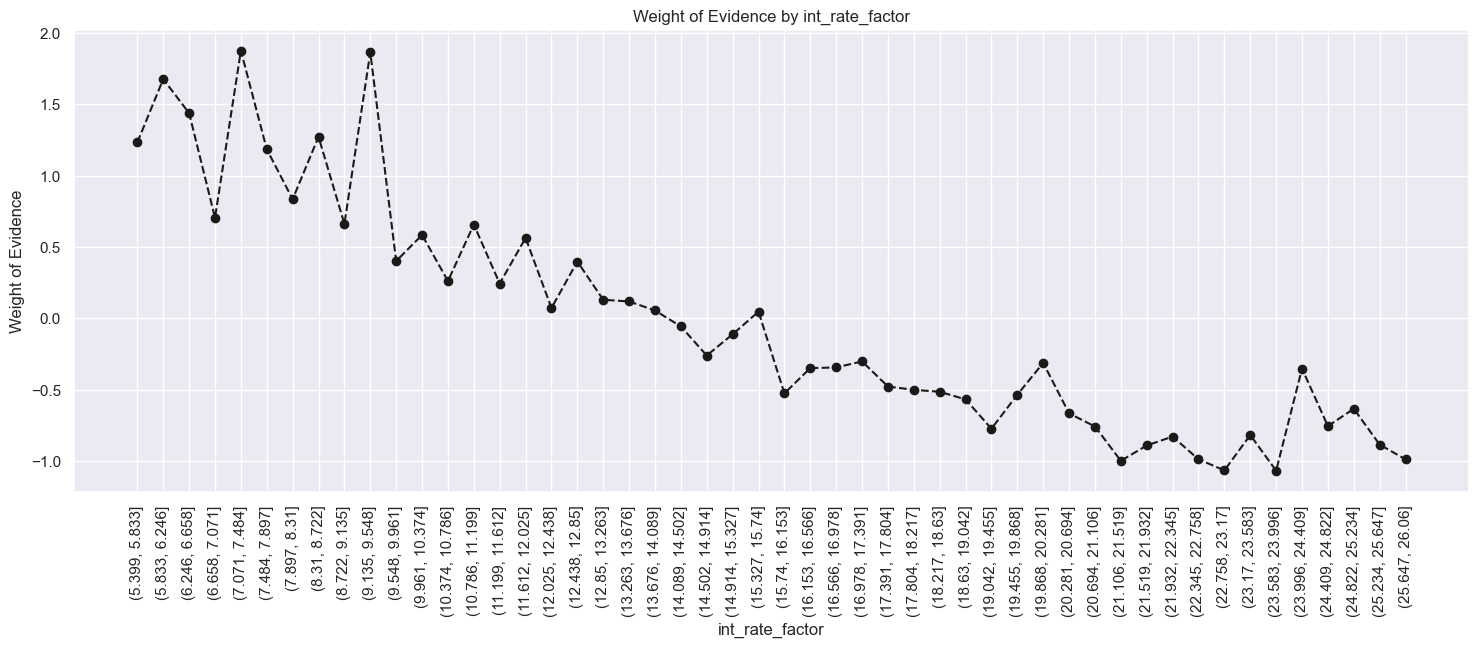

In [520]:
plot_by_woe(df_temp, 90)

In [521]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [522]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.887147    0.003421   283.0   36.0   
1     (1190.0, 1880.0]    800   0.897500    0.008578   718.0   82.0   
2     (1880.0, 2570.0]   1513   0.908130    0.016224  1374.0  139.0   
3     (2570.0, 3260.0]   1817   0.900385    0.019484  1636.0  181.0   
4     (3260.0, 3950.0]   1245   0.907631    0.013350  1130.0  115.0   
5     (3950.0, 4640.0]   2298   0.893386    0.024642  2053.0  245.0   
6     (4640.0, 5330.0]   3957   0.906242    0.042431  3586.0  371.0   
7     (5330.0, 6020.0]   4186   0.915671    0.044887  3833.0  353.0   
8     (6020.0, 6710.0]   1718   0.891735    0.018422  1532.0  186.0   
9     (6710.0, 7400.0]   2880   0.906597    0.030882  2611.0  269.0   
10    (7400.0, 8090.0]   4266   0.906001    0.045745  3865.0  401.0   
11    (8090.0, 8780.0]   1617   0.897959    0.017339  1452.0  165.0   
12    (8780.0, 9470.0]   2320   0.898707    0.024877  2085.0  235.0   
13   (9470.0, 10160.0]   8552   0.903999    0.091704  7731.0  821.0   
14  (10160.0, 10850.0]   1642   0.889769    0.017607  1461.0  181.0   
15  (10850.0, 11540.0]   2091   0.897178    0.022422  1876.0  215.0   
16  (11540.0, 12230.0]   5767   0.916594    0.061840  5286.0  481.0   
17  (12230.0, 12920.0]   1228   0.887622    0.013168  1090.0  138.0   
18  (12920.0, 13610.0]   1860   0.911828    0.019945  1696.0  164.0   
19  (13610.0, 14300.0]   2087   0.910398    0.022379  1900.0  187.0   
20  (14300.0, 14990.0]   1255   0.907570    0.013457  1139.0  116.0   
21  (14990.0, 15680.0]   5441   0.914538    0.058344  4976.0  465.0   
22  (15680.0, 16370.0]   2920   0.900342    0.031311  2629.0  291.0   
23  (16370.0, 17060.0]   1625   0.896615    0.017425  1457.0  168.0   
24  (17060.0, 17750.0]    921   0.863192    0.009876   795.0  126.0   
25  (17750.0, 18440.0]   2898   0.897170    0.031075  2600.0  298.0   
26  (18440.0, 19130.0]    989   0.871587    0.010605   862.0  127.0   
27  (19130.0, 19820.0]   1057   0.891202    0.011334   942.0  115.0   
28  (19820.0, 20510.0]   5055   0.909792    0.054205  4599.0  456.0   
29  (20510.0, 21200.0]   1635   0.909480    0.017532  1487.0  148.0   
30  (21200.0, 21890.0]    476   0.859244    0.005104   409.0   67.0   
31  (21890.0, 22580.0]   1028   0.896887    0.011023   922.0  106.0   
32  (22580.0, 23270.0]    633   0.903633    0.006788   572.0   61.0   
33  (23270.0, 23960.0]    497   0.853119    0.005329   424.0   73.0   
34  (23960.0, 24650.0]   2491   0.913689    0.026711  2276.0  215.0   
35  (24650.0, 25340.0]   2500   0.913600    0.026808  2284.0  216.0   
36  (25340.0, 26030.0]    487   0.872690    0.005222   425.0   62.0   
37  (26030.0, 26720.0]    299   0.839465    0.003206   251.0   48.0   
38  (26720.0, 27410.0]    410   0.887805    0.004396   364.0   46.0   
39  (27410.0, 28100.0]   1604   0.910848    0.017200  1461.0  143.0   
40  (28100.0, 28790.0]    204   0.877451    0.002188   179.0   25.0   
41  (28790.0, 29480.0]    286   0.849650    0.003067   243.0   43.0   
42  (29480.0, 30170.0]   1762   0.893871    0.018894  1575.0  187.0   
43  (30170.0, 30860.0]    133   0.842105    0.001426   112.0   21.0   
44  (30860.0, 31550.0]    218   0.844037    0.002338   184.0   34.0   
45  (31550.0, 32240.0]    367   0.937330    0.003935   344.0   23.0   
46  (32240.0, 32930.0]    139   0.920863    0.001491   128.0   11.0   
47  (32930.0, 33620.0]    275   0.909091    0.002949   250.0   25.0   
48  (33620.0, 34310.0]    142   0.908451    0.001523   129.0   13.0   
49  (34310.0, 35000.0]   3347   0.900508    0.035890  3014.0  333.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE     IV  
0      0.003360    0.003988 -0.171403             NaN       NaN  0.019  
1      0.008524    0.009084 -0.063581        0.010353  0.107822  0.019  
2      0.016312    0.015398  0.057676        0.010630  0.121257  0.019  
3      0.019423    0.020051 -0.031819        0.007744  0.089495  0.019  
4      0.013416  

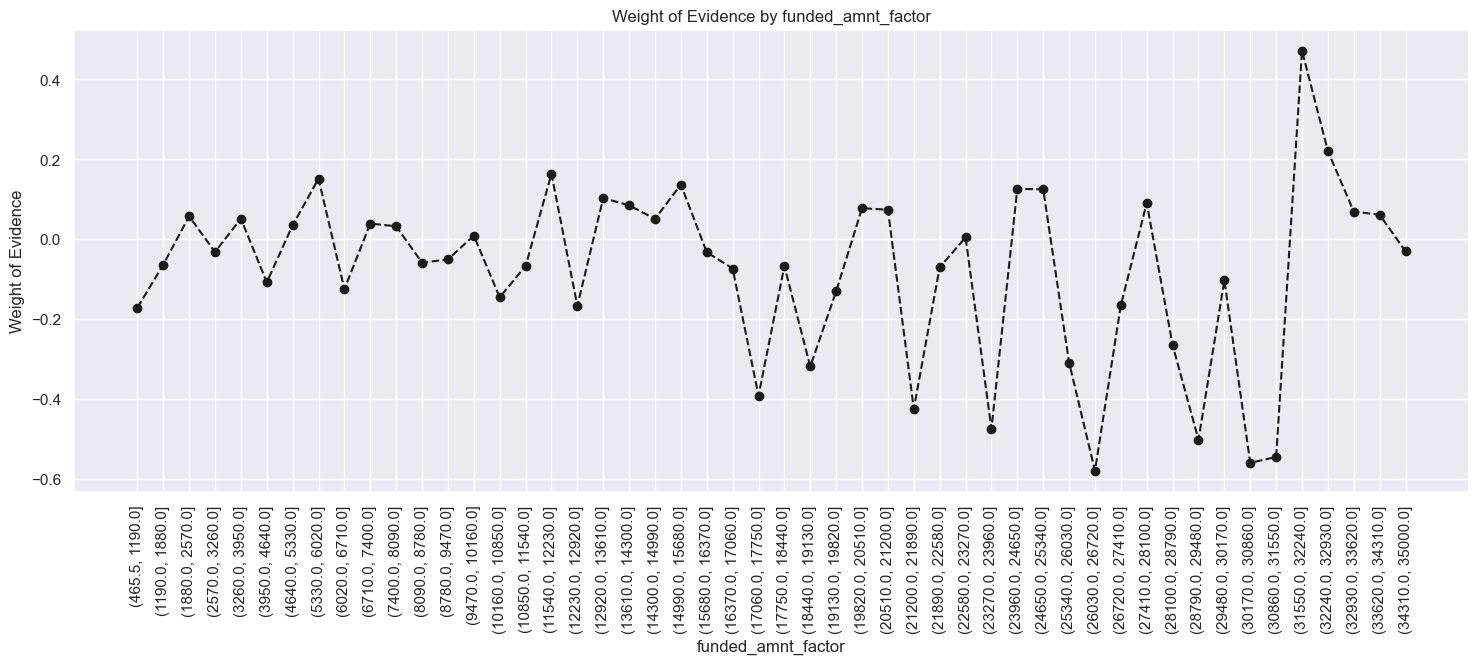

In [523]:
plot_by_woe(df_temp, 90)

There seems to be no association whatsoever between 'funded amount' and WoE, so there is no need to create dummy variables.

In [524]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.587, 11.74]      5   1.000000    0.000054     5.0   
1                      (11.74, 23.48]      0        NaN    0.000000     NaN   
2                      (23.48, 35.22]      0        NaN    0.000000     NaN   
3                      (35.22, 46.96]      0        NaN    0.000000     NaN   
4                       (46.96, 58.7]      0        NaN    0.000000     NaN   
5                       (58.7, 70.44]      0        NaN    0.000000     NaN   
6                      (70.44, 82.18]    182   0.945055    0.001952   172.0   
7                      (82.18, 93.92]    508   0.927165    0.005447   471.0   
8                     (93.92, 105.66]    715   0.881119    0.007667   630.0   
9                     (105.66, 117.4]   1268   0.870662    0.013597  1104.0   
10                    (117.4, 129.14]   2314   0.890666    0.024813  2061.0   
11                   (129.14, 140.88]   2816   0.876420    0.030196  2468.0   
12                   (140.88, 152.62]   3366   0.895425    0.036094  3014.0   
13                   (152.62, 164.36]   3989   0.896716    0.042774  3577.0   
14                    (164.36, 176.1]   4857   0.897468    0.052082  4359.0   
15                    (176.1, 187.84]   5076   0.906028    0.054430  4599.0   
16                   (187.84, 199.58]   6578   0.898297    0.070536  5909.0   
17                   (199.58, 211.32]   7131   0.900435    0.076466  6421.0   
18                   (211.32, 223.06]   6775   0.895941    0.072649  6070.0   
19                    (223.06, 234.8]   5521   0.901286    0.059202  4976.0   
20                    (234.8, 246.54]   4966   0.897704    0.053251  4458.0   
21                   (246.54, 258.28]   4549   0.903715    0.048779  4111.0   
22                   (258.28, 270.02]   4472   0.904293    0.047954  4044.0   
23                   (270.02, 281.76]   3672   0.908497    0.039375  3336.0   
24                    (281.76, 293.5]   3640   0.909066    0.039032  3309.0   
25                    (293.5, 305.24]   2602   0.913912    0.027901  2378.0   
26                   (305.24, 316.98]   1988   0.915996    0.021317  1821.0   
27                   (316.98, 328.72]   2020   0.913861    0.021661  1846.0   
28                   (328.72, 340.46]   2129   0.912635    0.022829  1943.0   
29                    (340.46, 352.2]   1810   0.916022    0.019409  1658.0   
30                    (352.2, 363.94]   1477   0.924171    0.015838  1365.0   
31                   (363.94, 375.68]   1360   0.920588    0.014583  1252.0   
32                   (375.68, 387.42]   1152   0.919271    0.012353  1059.0   
33                   (387.42, 399.16]   1051   0.908658    0.011270   955.0   
34                    (399.16, 410.9]    826   0.927361    0.008857   766.0   
35                    (410.9, 422.64]    808   0.934406    0.008664   755.0   
36                   (422.64, 434.38]    524   0.908397    0.005619   476.0   
37                   (434.38, 446.12]    416   0.923077    0.004461   384.0   
38                   (446.12, 457.86]    329   0.920973    0.003528   303.0   
39                    (457.86, 469.6]    376   0.928191    0.004032   349.0   
40                    (469.6, 481.34]    371   0.929919    0.003978   345.0   
41                   (481.34, 493.08]    294   0.914966    0.003153   269.0   
42                   (493.08, 504.82]    229   0.947598    0.002456   217.0   
43                   (504.82, 516.56]    178   0.915730    0.001909   163.0   
44                    (516.56, 528.3]    159   0.937107    0.001705   149.0   
45                    (528.3, 540.04]    140   0.914286    0.001501   128.0   
46                   (540.04, 551.78]    135   0.903704    0.001448   122.0   
47                   (551.78, 563.52]     93   0.924731    0.000997    86.0   
48                   (563.52, 575.26]     80   0.900000    0.000858    72.0   
49                    (575.26, 587.0]    310   0.8870

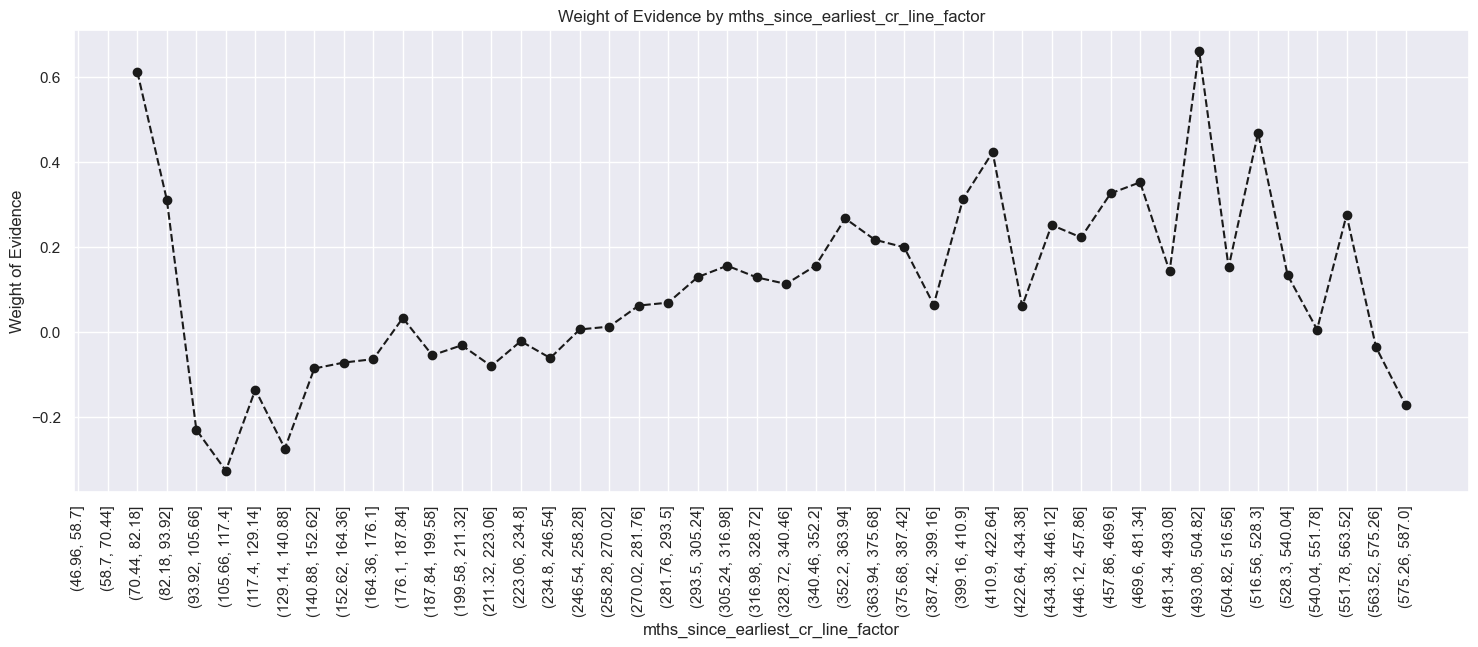

In [525]:
plot_by_woe(df_temp, 90)

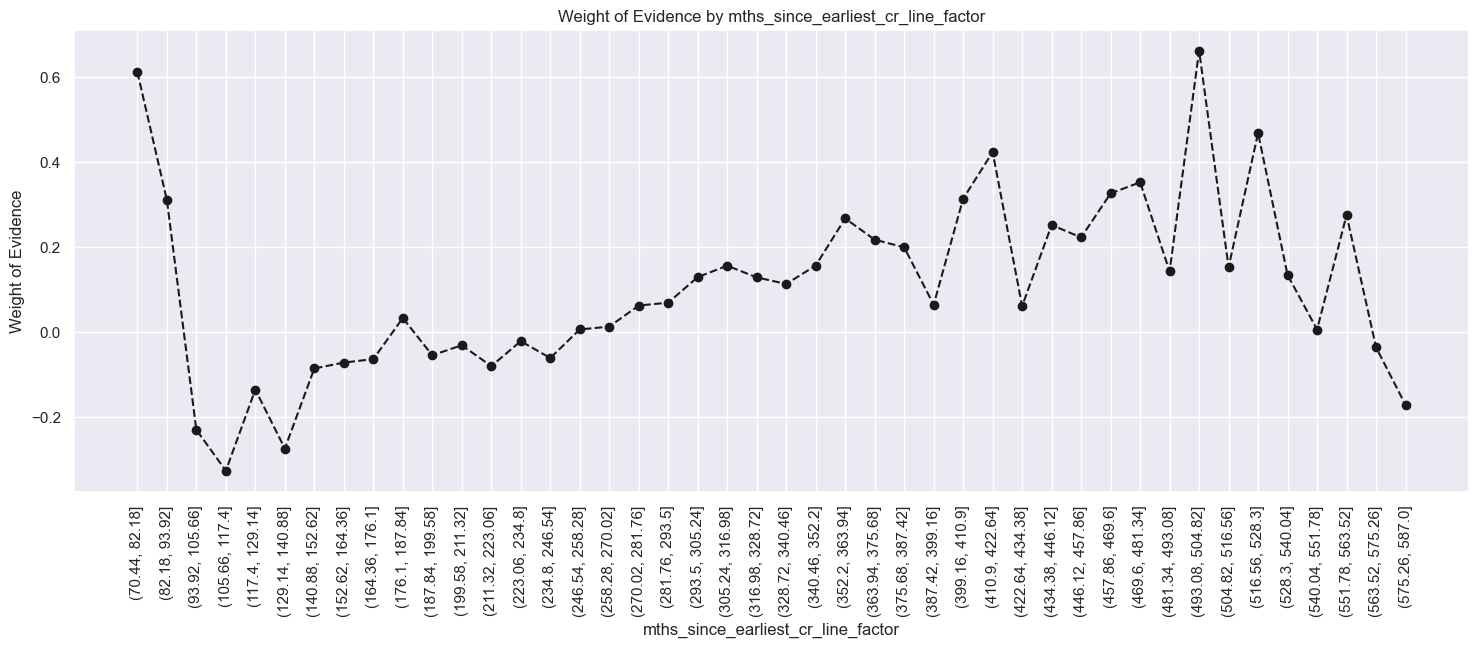

In [526]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [527]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [528]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0  76566   0.902646    0.821021  69112.0  7454.0     0.820515   
1           1.0  11297   0.905727    0.121138  10232.0  1065.0     0.121477   
2           2.0   3192   0.901942    0.034228   2879.0   313.0     0.034180   
3           3.0   1134   0.914462    0.012160   1037.0    97.0     0.012312   
4           4.0    510   0.905882    0.005469    462.0    48.0     0.005485   
5           5.0    270   0.922222    0.002895    249.0    21.0     0.002956   
6           6.0    128   0.882812    0.001373    113.0    15.0     0.001342   
7           7.0     67   0.910448    0.000718     61.0     6.0     0.000724   
8           8.0     29   0.896552    0.000311     26.0     3.0     0.000309   
9           9.0     22   0.954545    0.000236     21.0     1.0     0.000249   
10         10.0      9   0.888889    0.000097      8.0     1.0     0.000095   
11         11.0     10   1.000000    0.000107     10.0     0.0     0.000119   
12         12.0      8   0.750000    0.000086      6.0     2.0     0.000071   
13         13.0      7   1.000000    0.000075      7.0     0.0     0.000083   
14         14.0      2   0.500000    0.000021      1.0     1.0     0.000012   
15         15.0      1   1.000000    0.000011      1.0     0.0     0.000012   
16         16.0      1   1.000000    0.000011      1.0     0.0     0.000012   
17         18.0      3   1.000000    0.000032      3.0     0.0     0.000036   
18         19.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.825745 -0.006353             NaN       NaN  inf  
1     0.117979  0.029214        0.003081  0.035568  inf  
2     0.034674 -0.014336        0.003785  0.043550  inf  
3     0.010746  0.136045        0.012520  0.150381  inf  
4     0.005317  0.031033        0.008580  0.105012  inf  
5     0.002326  0.239599        0.016340  0.208567  inf  
6     0.001662 -0.213993        0.039410  0.453593  inf  
7     0.000665  0.085783        0.027635  0.299777  inf  
8     0.000332 -0.073847        0.013896  0.159630  inf  
9     0.000111  0.811191        0.057994  0.885038  inf  
10    0.000111 -0.153890        0.065657  0.965081  inf  
11    0.000000       inf        0.111111       inf  inf  
12    0.000222 -1.134719        0.250000       inf  inf  
13    0.000000       inf        0.250000       inf  inf  
14    0.000111 -2.233331        0.500000       inf  inf  
15    0.000000       inf        0.500000       inf  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf

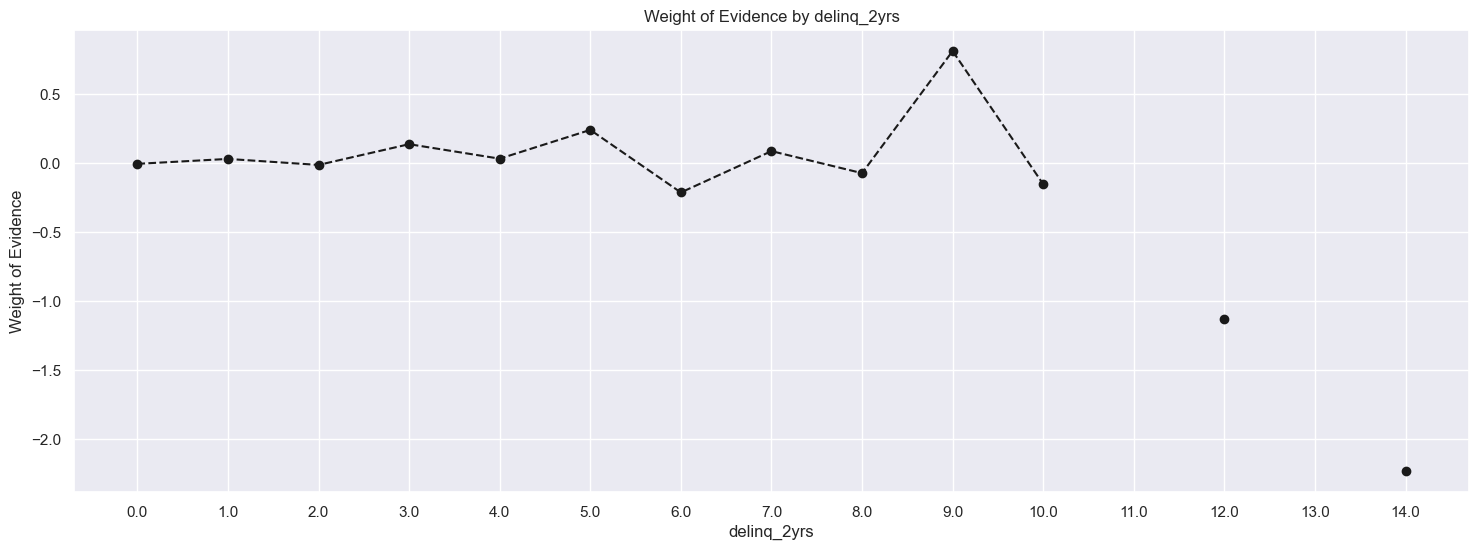

In [529]:
plot_by_woe(df_temp)

In [530]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [531]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

/Users/mang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.921627    0.517870  44510.0  3785.0   
1              1.0  25985   0.896363    0.278639  23292.0  2693.0   
2              2.0  11611   0.875205    0.124505  10162.0  1449.0   
3              3.0   5086   0.856272    0.054537   4355.0   731.0   
4              4.0   1431   0.856744    0.015345   1226.0   205.0   
5              5.0    551   0.843920    0.005908    465.0    86.0   
6              6.0    211   0.796209    0.002263    168.0    43.0   
7              7.0     36   0.527778    0.000386     19.0    17.0   
8              8.0     21   0.523810    0.000225     11.0    10.0   
9              9.0      7   0.428571    0.000075      3.0     4.0   
10            10.0      7   0.857143    0.000075      6.0     1.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   0.000000    0.000011      0.0     1.0   
14            14.0      1   0.000000    0.000011      0.0     1.0   
15            18.0      2   0.500000    0.000021      1.0     1.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.528434    0.419298  0.231337             NaN       NaN  inf  
1      0.276529    0.298327 -0.075877        0.025264  0.307214  inf  
2      0.120646    0.160518 -0.285549        0.021159  0.209673  inf  
3      0.051704    0.080979 -0.448665        0.018932  0.163115  inf  
4      0.014555    0.022710 -0.444829        0.000471  0.003836  inf  
5      0.005521    0.009527 -0.545641        0.012823  0.100812  inf  
6      0.001995    0.004763 -0.870567        0.047712  0.324926  inf  
7      0.000226    0.001883 -2.122105        0.268431  1.251538  inf  
8      0.000131    0.001108 -2.138021        0.003968  0.015915  inf  
9      0.000036    0.000443 -2.521013        0.095238  0.382992  inf  
10     0.000071    0.000111 -0.441572        0.428571  2.079442  inf  
11     0.000083    0.000000       inf        0.142857       inf  inf  
12     0.000036    0.000000       inf        0.000000       NaN  inf  
13     0.000000    0.000111      -inf        1.000000       inf  inf  
14     0.000000    0.000111      -inf        0.000000       NaN  inf  
15     0.000012    0.000111 -2.233331        0.500000       inf  inf  
16     0.000012    0.000000       inf        0.500000       inf  inf  
17     0.000012    0.000000       inf        0.000000       NaN  inf

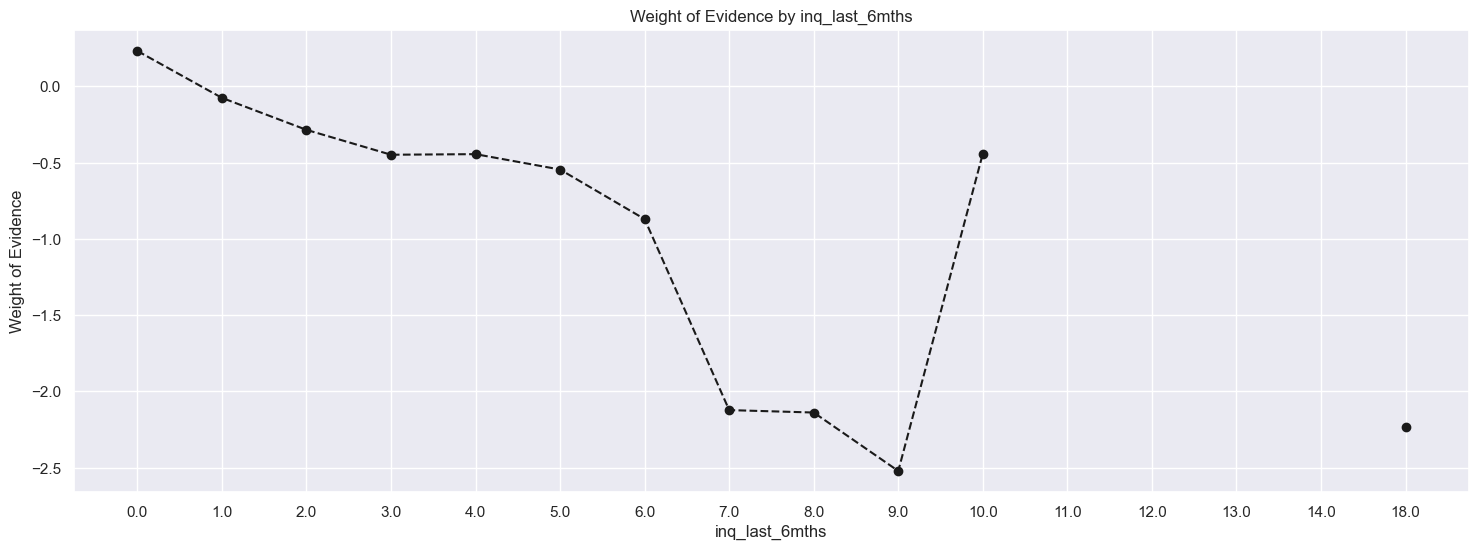

In [532]:
plot_by_woe(df_temp)

In [533]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [534]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      7   1.000000    0.000075     7.0    0.0     0.000083   
1        1.0     32   0.937500    0.000343    30.0    2.0     0.000356   
2        2.0    334   0.841317    0.003582   281.0   53.0     0.003336   
3        3.0   1122   0.861854    0.012031   967.0  155.0     0.011480   
4        4.0   2560   0.899219    0.027451  2302.0  258.0     0.027330   
5        5.0   4403   0.901431    0.047214  3969.0  434.0     0.047121   
6        6.0   6216   0.901062    0.066655  5601.0  615.0     0.066496   
7        7.0   7433   0.898830    0.079704  6681.0  752.0     0.079319   
8        8.0   8314   0.906062    0.089151  7533.0  781.0     0.089434   
9        9.0   8768   0.901688    0.094020  7906.0  862.0     0.093862   
10      10.0   8576   0.898554    0.091961  7706.0  870.0     0.091488   
11      11.0   7740   0.907106    0.082996  7021.0  719.0     0.083355   
12      12.0   6886   0.902411    0.073839  6214.0  672.0     0.073774   
13      13.0   5914   0.904295    0.063416  5348.0  566.0     0.063493   
14      14.0   4960   0.908669    0.053186  4507.0  453.0     0.053508   
15      15.0   4006   0.904893    0.042957  3625.0  381.0     0.043037   
16      16.0   3269   0.910370    0.035054  2976.0  293.0     0.035332   
17      17.0   2680   0.902612    0.028738  2419.0  261.0     0.028719   
18      18.0   2259   0.915007    0.024223  2067.0  192.0     0.024540   
19      19.0   1811   0.911651    0.019419  1651.0  160.0     0.019601   
20      20.0   1444   0.907895    0.015484  1311.0  133.0     0.015565   
21      21.0   1037   0.903568    0.011120   937.0  100.0     0.011124   
22      22.0    784   0.905612    0.008407   710.0   74.0     0.008429   
23      23.0    628   0.918790    0.006734   577.0   51.0     0.006850   
24      24.0    473   0.904863    0.005072   428.0   45.0     0.005081   
25      25.0    391   0.897698    0.004193   351.0   40.0     0.004167   
26      26.0    250   0.916000    0.002681   229.0   21.0     0.002719   
27      27.0    204   0.921569    0.002188   188.0   16.0     0.002232   
28      28.0    153   0.908497    0.001641   139.0   14.0     0.001650   
29      29.0    128   0.890625    0.001373   114.0   14.0     0.001353   
30      30.0    107   0.934579    0.001147   100.0    7.0     0.001187   
31      31.0     73   0.904110    0.000783    66.0    7.0     0.000784   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000700   
33      33.0     47   0.893617    0.000504    42.0    5.0     0.000499   
34      34.0     40   0.825000    0.000429    33.0    7.0     0.000392   
35      35.0     33   0.969697    0.000354    32.0    1.0     0.000380   
36      36.0     22   0.863636    0.000236    19.0    3.0     0.000226   
37      37.0     21   0.904762    0.000225    19.0    2.0     0.000226   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000154   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000131   
40      40.0      9   0.666667    0.000097     6.0    3.0     0.000071   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000071   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000083   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000047   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000047   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

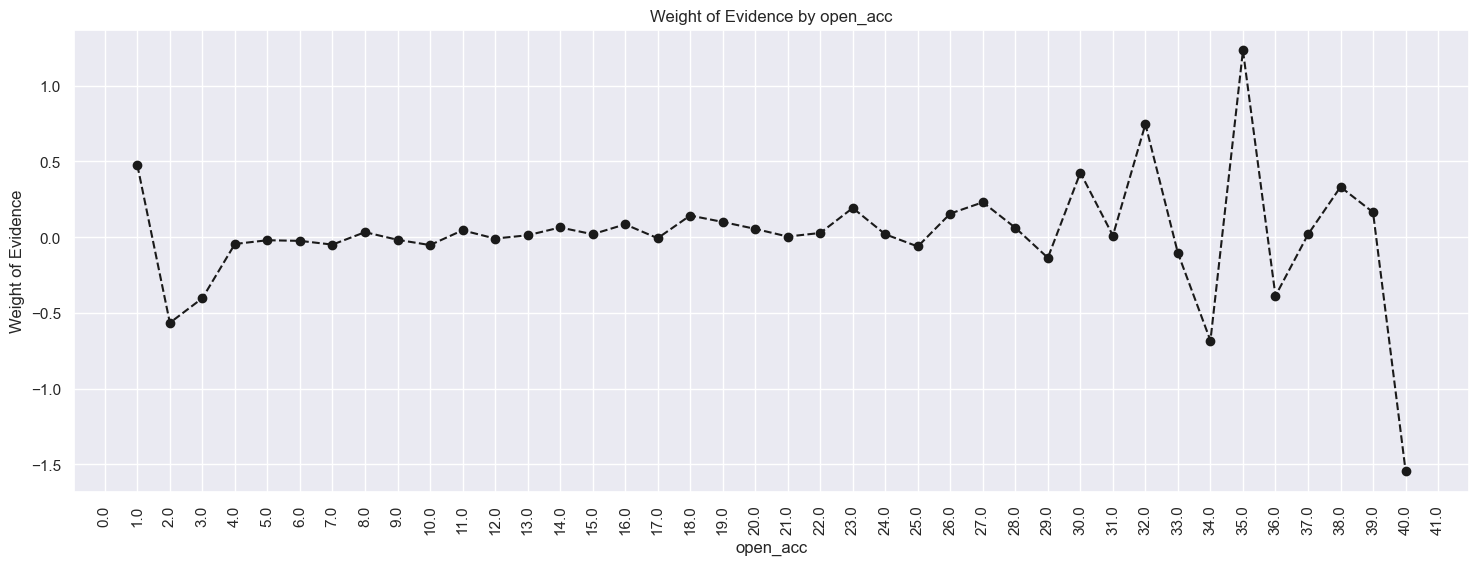

In [535]:
plot_by_woe(df_temp, 90)

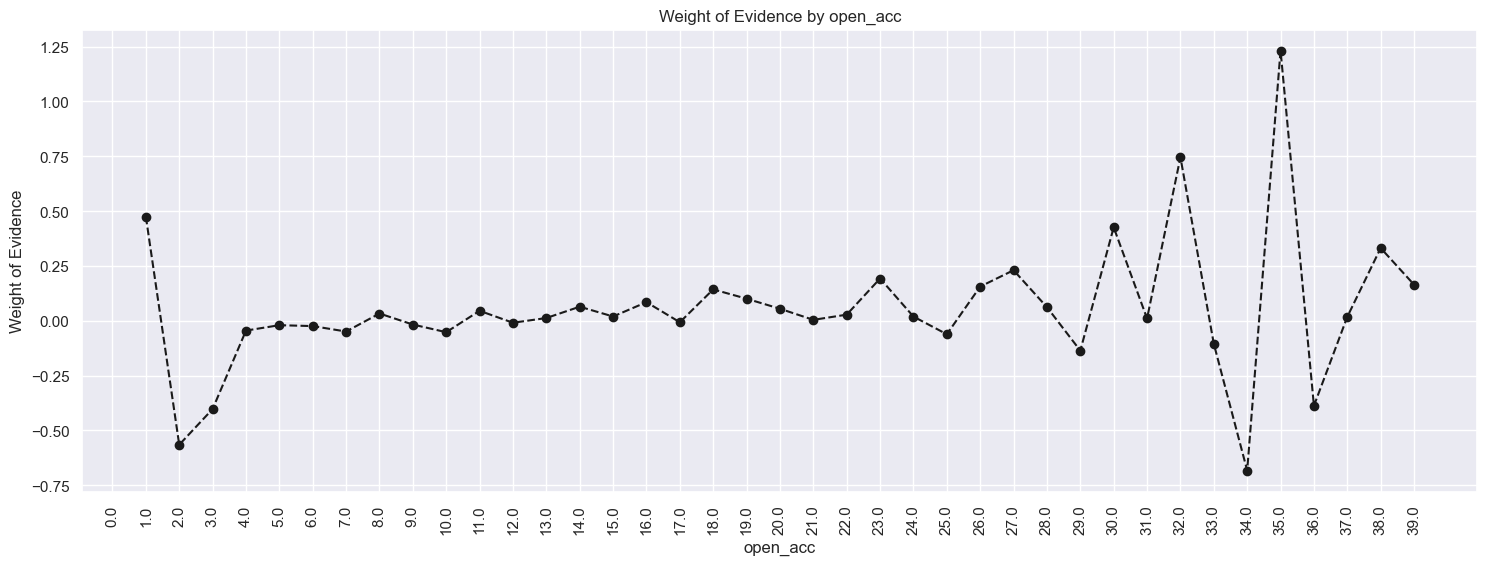

In [536]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [537]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [538]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80923   0.901412    0.867742  72945.0  7978.0     0.866022   
1       1.0  10670   0.914902    0.114415   9762.0   908.0     0.115897   
2       2.0   1097   0.917046    0.011763   1006.0    91.0     0.011943   
3       3.0    331   0.924471    0.003549    306.0    25.0     0.003633   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001140   
5       5.0     73   0.917808    0.000783     67.0     6.0     0.000795   
6       6.0     19   1.000000    0.000204     19.0     0.0     0.000226   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000131   
8       8.0      5   1.000000    0.000054      5.0     0.0     0.000059   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000059   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.883793 -0.020313             NaN       NaN  inf  
1     0.100587  0.141677        0.013489  0.161990  inf  
2     0.010081  0.169547        0.002145  0.027870  inf  
3     0.002769  0.271378        0.007425  0.101831  inf  
4     0.001772 -0.441572        0.067328  0.712950  inf  
5     0.000665  0.179602        0.060665  0.621174  inf  
6     0.000000       inf        0.082192       inf  inf  
7     0.000332 -0.934048        0.214286       inf  inf  
8     0.000000       inf        0.214286       inf  inf  
9     0.000000       inf        0.000000       NaN  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

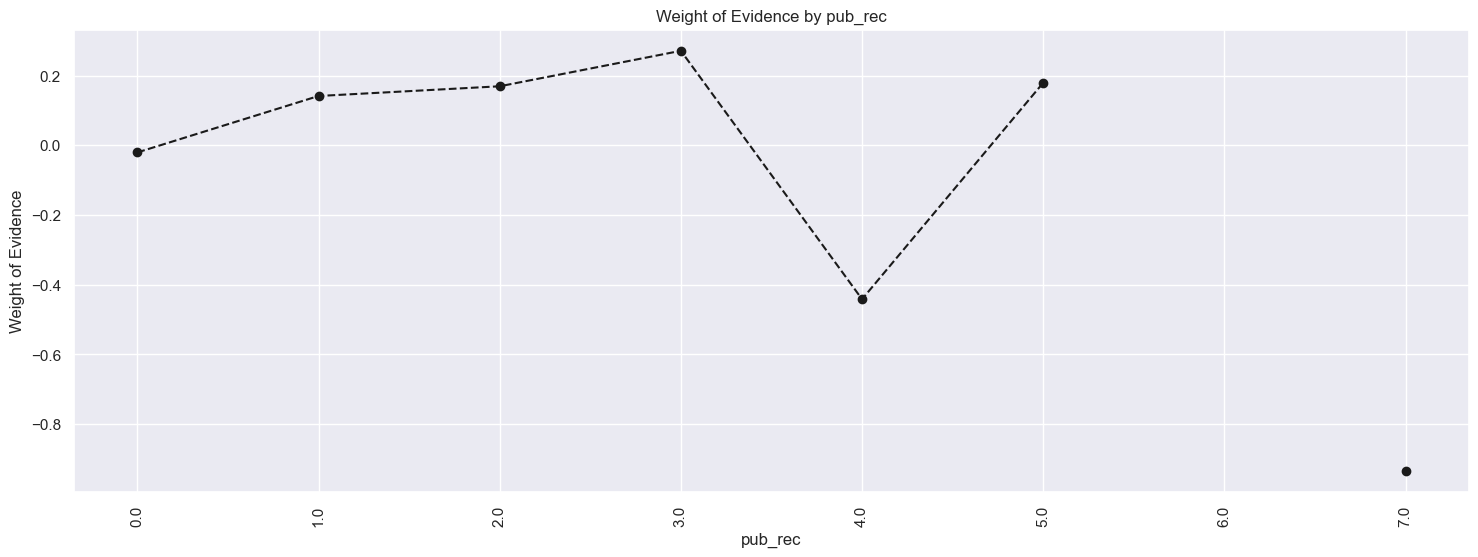

In [539]:
plot_by_woe(df_temp, 90)

In [540]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [541]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125   0.784000    0.001340     98.0    27.0   
1       (3.12, 6.24]   1499   0.865911    0.016074   1298.0   201.0   
2       (6.24, 9.36]   3715   0.884522    0.039836   3286.0   429.0   
3      (9.36, 12.48]   6288   0.889313    0.067427   5592.0   696.0   
4      (12.48, 15.6]   8289   0.900832    0.088883   7467.0   822.0   
5      (15.6, 18.72]   9843   0.901351    0.105547   8872.0   971.0   
6     (18.72, 21.84]  10270   0.904869    0.110126   9293.0   977.0   
7     (21.84, 24.96]   9971   0.905827    0.106920   9032.0   939.0   
8     (24.96, 28.08]  11873   0.904995    0.127315  10745.0  1128.0   
9      (28.08, 31.2]   7289   0.904925    0.078160   6596.0   693.0   
10     (31.2, 34.32]   6151   0.913022    0.065958   5616.0   535.0   
11    (34.32, 37.44]   4745   0.916333    0.050881   4348.0   397.0   
12    (37.44, 40.56]   3615   0.912033    0.038764   3297.0   318.0   
13    (40.56, 43.68]   2883   0.904613    0.030915   2608.0   275.0   
14     (43.68, 46.8]   1938   0.901445    0.020781   1747.0   191.0   
15     (46.8, 49.92]   1478   0.922192    0.015849   1363.0   115.0   
16    (49.92, 53.04]   1309   0.912147    0.014036   1194.0   115.0   
17    (53.04, 56.16]    640   0.920312    0.006863    589.0    51.0   
18    (56.16, 59.28]    428   0.885514    0.004589    379.0    49.0   
19     (59.28, 62.4]    386   0.891192    0.004139    344.0    42.0   
20     (62.4, 65.52]    322   0.866460    0.003453    279.0    43.0   
21    (65.52, 68.64]     57   0.982456    0.000611     56.0     1.0   
22    (68.64, 71.76]     43   0.930233    0.000461     40.0     3.0   
23    (71.76, 74.88]     24   1.000000    0.000257     24.0     0.0   
24     (74.88, 78.0]     26   0.923077    0.000279     24.0     2.0   
25     (78.0, 81.12]     13   0.769231    0.000139     10.0     3.0   
26    (81.12, 84.24]     11   0.909091    0.000118     10.0     1.0   
27    (84.24, 87.36]      8   0.875000    0.000086      7.0     1.0   
28    (87.36, 90.48]      6   0.833333    0.000064      5.0     1.0   
29     (90.48, 93.6]      7   0.857143    0.000075      6.0     1.0   
30     (93.6, 96.72]      1   1.000000    0.000011      1.0     0.0   
31    (96.72, 99.84]      3   1.000000    0.000032      3.0     0.0   
32   (99.84, 102.96]      0        NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      0        NaN    0.000000      NaN     NaN   
34   (106.08, 109.2]      0        NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        NaN    0.000000      NaN     NaN   
49   (152.88, 156.0]      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001163    0.002991 -0.944200             NaN       NaN  inf  
1      0.015410    0.022267 -0.368056        0.081911  0.576144  inf  
2      0.039012    0.047524 -0.197362        0.018612  0.170694  inf  
3      0.066390    0.077102 -0.149588        0.004791  0.047773  inf  
4      0.088650    0.091060

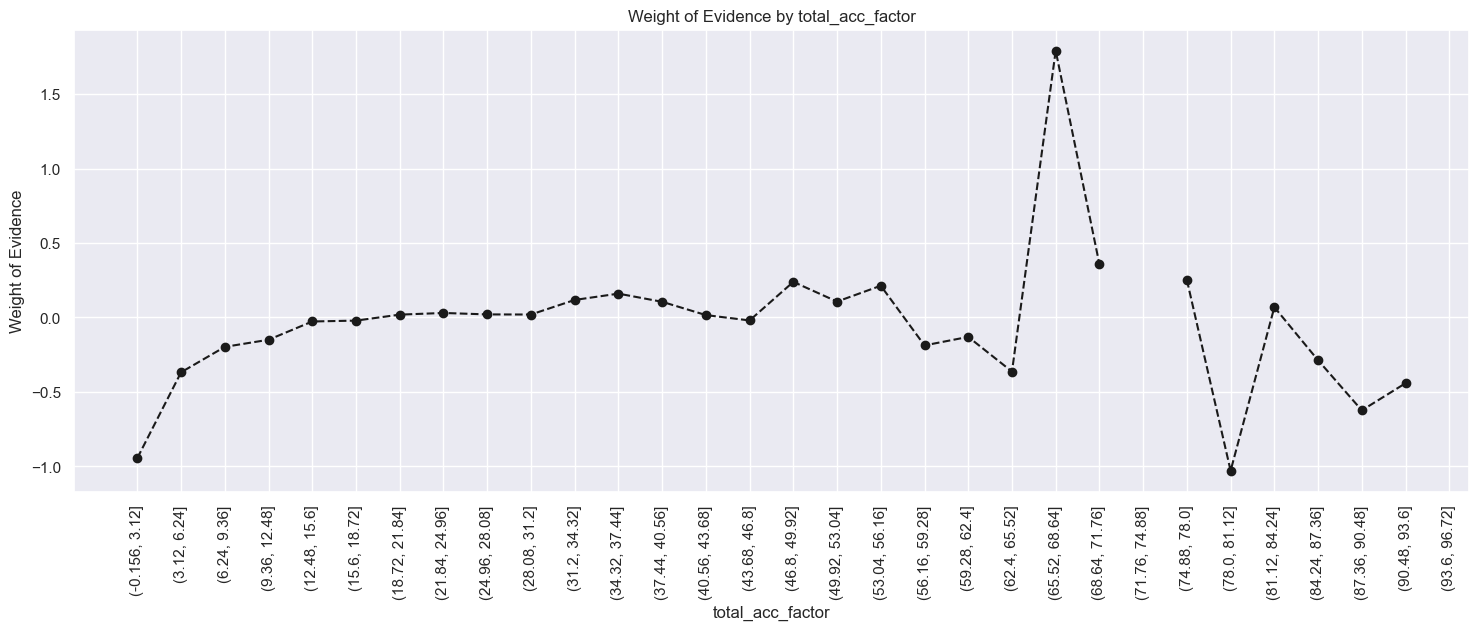

In [542]:
plot_by_woe(df_temp, 90)

In [543]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [544]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0             0.0  92871   0.903156    0.995861  83877.0  8994.0     0.995809   
1             1.0    360   0.916667    0.003860    330.0    30.0     0.003918   
2             2.0     22   0.909091    0.000236     20.0     2.0     0.000237   
3             3.0      4   0.750000    0.000043      3.0     1.0     0.000036   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.996344 -0.000537             NaN       NaN  0.000185  
1    0.003323  0.164564        0.013511  0.165102  0.000185  
2    0.000222  0.069254        0.007576  0.095310  0.000185  
3    0.000111 -1.134719        0.159091  1.203973  0.000185

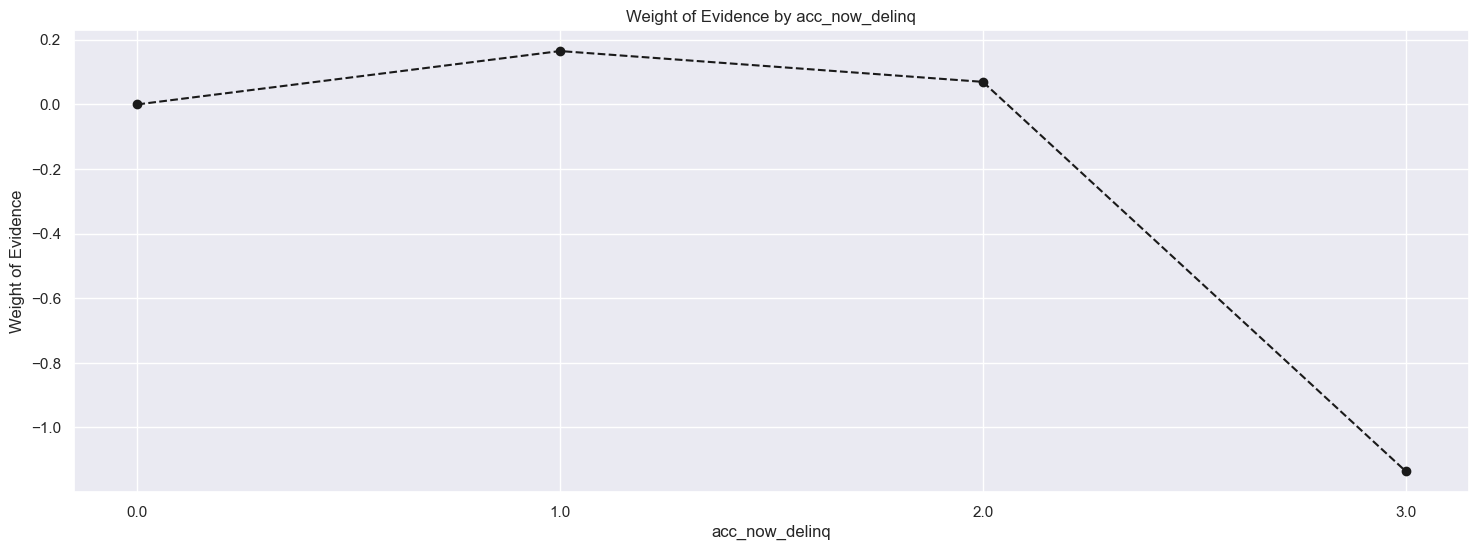

In [545]:
plot_by_woe(df_temp)

In [546]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [547]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

/Users/mang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238   0.844538    0.002552   201.0   37.0   
1           (1006.566, 2013.133]    678   0.831858    0.007270   564.0  114.0   
2             (2013.133, 3019.7]   1121   0.859054    0.012021   963.0  158.0   
3             (3019.7, 4026.266]   1461   0.889117    0.015666  1299.0  162.0   
4           (4026.266, 5032.832]   2163   0.882571    0.023194  1909.0  254.0   
...                          ...    ...        ...         ...     ...    ...   
1995  (2008100.168, 2009106.734]      0        NaN    0.000000     NaN    NaN   
1996  (2009106.734, 2010113.301]      0        NaN    0.000000     NaN    NaN   
1997  (2010113.301, 2011119.867]      0        NaN    0.000000     NaN    NaN   
1998  (2011119.867, 2012126.434]      0        NaN    0.000000     NaN    NaN   
1999    (2012126.434, 2013133.0]      1   1.000000    0.000011     1.0    0.0   

      prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0        0.002386    0.004099 -0.540944             NaN       NaN  inf  
1        0.006696    0.012629 -0.634475        0.012679  0.093531  inf  
2        0.011433    0.017503 -0.425873        0.027196  0.208603  inf  
3        0.015422    0.017946 -0.151577        0.030063  0.274295  inf  
4        0.022664    0.028138 -0.216331        0.006547  0.064753  inf  
...           ...         ...       ...             ...       ...  ...  
1995          NaN         NaN       NaN             NaN       NaN  inf  
1996          NaN         NaN       NaN             NaN       NaN  inf  
1997          NaN         NaN       NaN             NaN       NaN  inf  
1998          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.000012    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

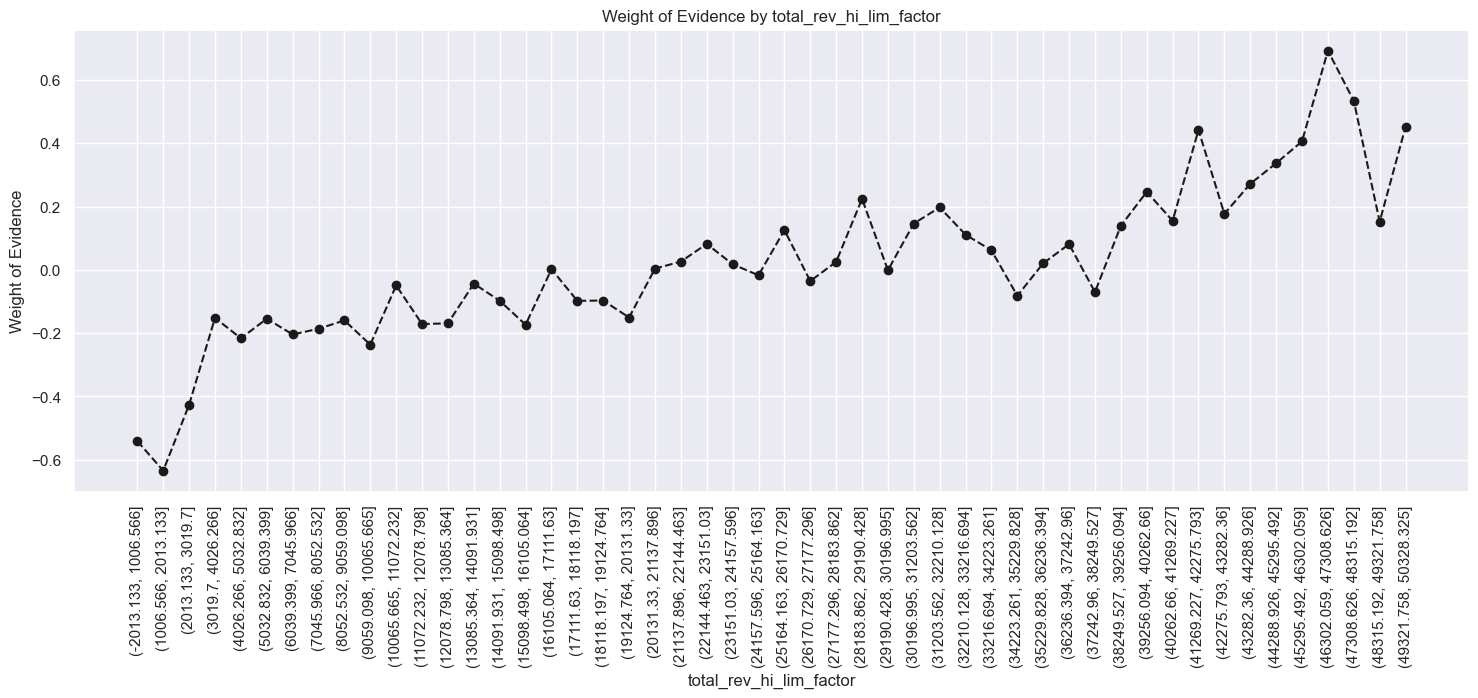

In [548]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [549]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [550]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485   0.874227    0.005201   424.0   61.0   
1       (43.585, 71.41]   1246   0.907705    0.013361  1131.0  115.0   
2       (71.41, 99.235]   1731   0.903524    0.018562  1564.0  167.0   
3      (99.235, 127.06]   2292   0.907941    0.024577  2081.0  211.0   
4     (127.06, 154.885]   2602   0.896234    0.027901  2332.0  270.0   
5     (154.885, 182.71]   4133   0.905880    0.044318  3744.0  389.0   
6     (182.71, 210.535]   4109   0.913361    0.044061  3753.0  356.0   
7     (210.535, 238.36]   3730   0.910188    0.039997  3395.0  335.0   
8     (238.36, 266.185]   4660   0.913948    0.049969  4259.0  401.0   
9     (266.185, 294.01]   4975   0.903719    0.053347  4496.0  479.0   
10    (294.01, 321.835]   5186   0.914771    0.055610  4744.0  442.0   
11    (321.835, 349.66]   6432   0.904073    0.068971  5815.0  617.0   
12    (349.66, 377.485]   4758   0.896595    0.051020  4266.0  492.0   
13    (377.485, 405.31]   4352   0.913143    0.046667  3974.0  378.0   
14    (405.31, 433.135]   3429   0.896180    0.036769  3073.0  356.0   
15    (433.135, 460.96]   3225   0.894264    0.034582  2884.0  341.0   
16    (460.96, 488.785]   3865   0.906598    0.041445  3504.0  361.0   
17    (488.785, 516.61]   3861   0.902357    0.041402  3484.0  377.0   
18    (516.61, 544.435]   2730   0.879853    0.029274  2402.0  328.0   
19    (544.435, 572.26]   2564   0.896646    0.027494  2299.0  265.0   
20    (572.26, 600.085]   2434   0.889893    0.026100  2166.0  268.0   
21    (600.085, 627.91]   2294   0.912816    0.024599  2094.0  200.0   
22    (627.91, 655.735]   2091   0.912960    0.022422  1909.0  182.0   
23    (655.735, 683.56]   2295   0.905447    0.024609  2078.0  217.0   
24    (683.56, 711.385]   1650   0.889697    0.017693  1468.0  182.0   
25    (711.385, 739.21]   1252   0.902556    0.013425  1130.0  122.0   
26    (739.21, 767.035]   1360   0.907353    0.014583  1234.0  126.0   
27    (767.035, 794.86]   1160   0.902586    0.012439  1047.0  113.0   
28    (794.86, 822.685]   1023   0.904203    0.010970   925.0   98.0   
29    (822.685, 850.51]    967   0.902792    0.010369   873.0   94.0   
30    (850.51, 878.335]   1046   0.908222    0.011216   950.0   96.0   
31    (878.335, 906.16]    707   0.882603    0.007581   624.0   83.0   
32    (906.16, 933.985]    604   0.879139    0.006477   531.0   73.0   
33    (933.985, 961.81]    635   0.869291    0.006809   552.0   83.0   
34    (961.81, 989.635]    460   0.865217    0.004933   398.0   62.0   
35   (989.635, 1017.46]    441   0.877551    0.004729   387.0   54.0   
36  (1017.46, 1045.285]    305   0.875410    0.003271   267.0   38.0   
37  (1045.285, 1073.11]    206   0.898058    0.002209   185.0   21.0   
38  (1073.11, 1100.935]    228   0.899123    0.002445   205.0   23.0   
39  (1100.935, 1128.76]    247   0.939271    0.002649   232.0   15.0   
40  (1128.76, 1156.585]    227   0.925110    0.002434   210.0   17.0   
41  (1156.585, 1184.41]    287   0.909408    0.003078   261.0   26.0   
42  (1184.41, 1212.235]    308   0.935065    0.003303   288.0   20.0   
43  (1212.235, 1240.06]    284   0.926056    0.003045   263.0   21.0   
44  (1240.06, 1267.885]    159   0.899371    0.001705   143.0   16.0   
45  (1267.885, 1295.71]    132   0.871212    0.001415   115.0   17.0   
46  (1295.71, 1323.535]     47   0.787234    0.000504    37.0   10.0   
47  (1323.535, 1351.36]     21   0.761905    0.000225    16.0    5.0   
48  (1351.36, 1379.185]     15   0.733333    0.000161    11.0    4.0   
49  (1379.185, 1407.01]      7   1.000000    0.000075     7.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.005034    0.006758 -0.294471             NaN       NaN  inf  
1      0.013428    0.012740  0.052594        0.033478  0.347066  inf  
2      0.018568    0.018500  0.003677        0.004181  0.048917  inf  
3      0.024706    0.023374  0.055415        0.0

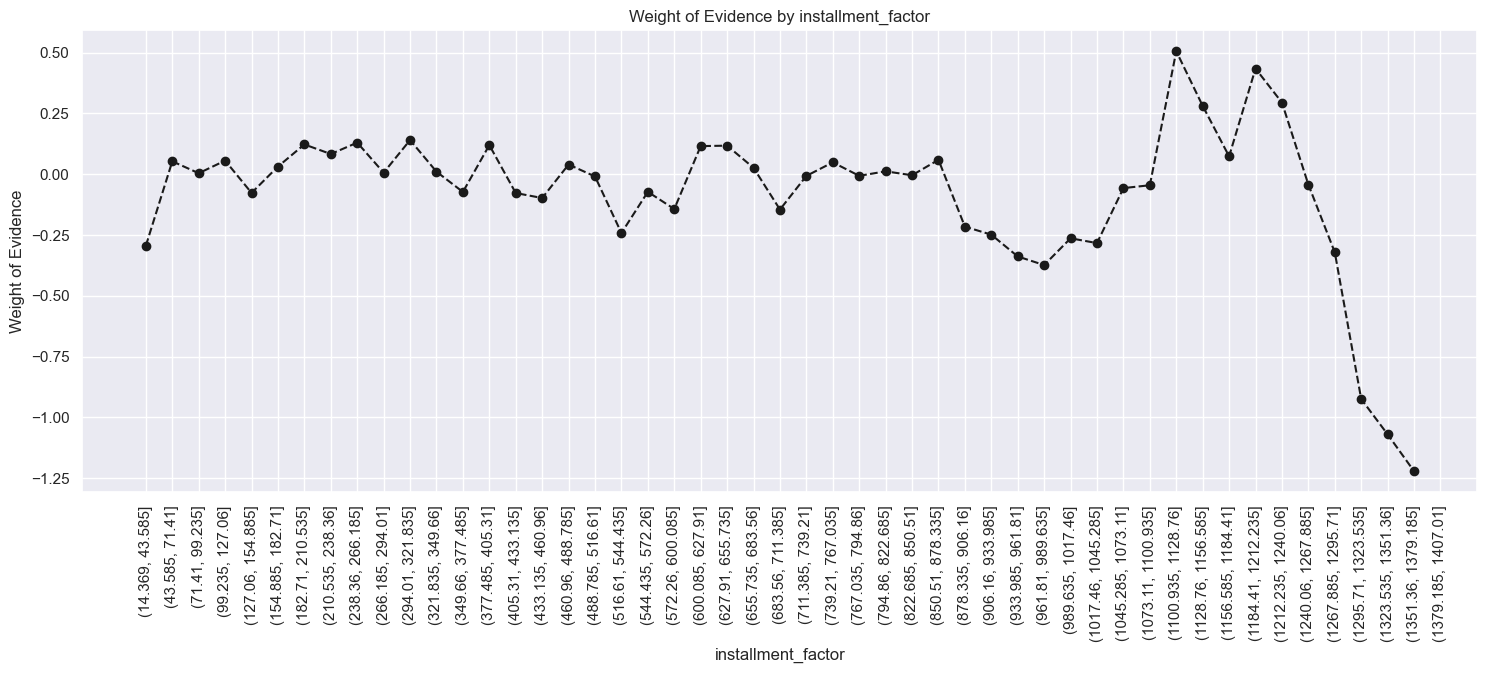

In [551]:
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [552]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203   0.901584    0.956529  80424.0  8779.0   
1     (154704.0, 304608.0]   3626   0.937672    0.038882   3400.0   226.0   
2     (304608.0, 454512.0]    282   0.936170    0.003024    264.0    18.0   
3     (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4     (604416.0, 754320.0]     23   1.000000    0.000247     23.0     0.0   
5     (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6    (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7   (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8   (1204032.0, 1353936.0]      2   1.000000    0.000021      2.0     0.0   
9   (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
10  (1503840.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN    0.000000      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN    0.000000      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN    0.000000      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN    0.000000      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN    0.000000      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN    0.000000      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN    0.000000      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN    0.000000      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN    0.000000      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN    0.000000      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN    0.000000      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN    0.000000      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN    0.000000      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN    0.000000      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN    0.000000      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN    0.000000      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN    0.000000      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN    0.000000      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN    0.000000      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN    0.000000      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN    0.000000      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN    0.000000      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
49  (7350096.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.9

In [553]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  62621   0.891155    0.671488  55805.0  6816.0   
1      (79752.0, 154704.0]  26582   0.926153    0.285040  24619.0  1963.0   
2     (154704.0, 229656.0]   2916   0.936214    0.031268   2730.0   186.0   
3     (229656.0, 304608.0]    710   0.943662    0.007613    670.0    40.0   
4     (304608.0, 379560.0]    171   0.935673    0.001834    160.0    11.0   
5     (379560.0, 454512.0]    111   0.936937    0.001190    104.0     7.0   
6     (454512.0, 529464.0]     53   0.962264    0.000568     51.0     2.0   
7     (529464.0, 604416.0]     33   0.969697    0.000354     32.0     1.0   
8     (604416.0, 679368.0]     10   1.000000    0.000107     10.0     0.0   
9     (679368.0, 754320.0]     13   1.000000    0.000139     13.0     0.0   
10    (754320.0, 829272.0]      5   1.000000    0.000054      5.0     0.0   
11    (829272.0, 904224.0]     13   0.923077    0.000139     12.0     1.0   
12    (904224.0, 979176.0]      3   1.000000    0.000032      3.0     0.0   
13   (979176.0, 1054128.0]      4   1.000000    0.000043      4.0     0.0   
14  (1054128.0, 1129080.0]      3   1.000000    0.000032      3.0     0.0   
15  (1129080.0, 1204032.0]      3   1.000000    0.000032      3.0     0.0   
16  (1204032.0, 1278984.0]      2   1.000000    0.000021      2.0     0.0   
17  (1278984.0, 1353936.0]      0        NaN    0.000000      NaN     NaN   
18  (1353936.0, 1428888.0]      0        NaN    0.000000      NaN     NaN   
19  (1428888.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
20  (1503840.0, 1578792.0]      0        NaN    0.000000      NaN     NaN   
21  (1578792.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
22  (1653744.0, 1728696.0]      0        NaN    0.000000      NaN     NaN   
23  (1728696.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
24  (1803648.0, 1878600.0]      0        NaN    0.000000      NaN     NaN   
25  (1878600.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
26  (1953552.0, 2028504.0]      0        NaN    0.000000      NaN     NaN   
27  (2028504.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
28  (2103456.0, 2178408.0]      0        NaN    0.000000      NaN     NaN   
29  (2178408.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
30  (2253360.0, 2328312.0]      0        NaN    0.000000      NaN     NaN   
31  (2328312.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
32  (2403264.0, 2478216.0]      0        NaN    0.000000      NaN     NaN   
33  (2478216.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
34  (2553168.0, 2628120.0]      0        NaN    0.000000      NaN     NaN   
35  (2628120.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
36  (2703072.0, 2778024.0]      0        NaN    0.000000      NaN     NaN   
37  (2778024.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
38  (2852976.0, 2927928.0]      0        NaN    0.000000      NaN     NaN   
39  (2927928.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
40  (3002880.0, 3077832.0]      0        NaN    0.000000      NaN     NaN   
41  (3077832.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
42  (3152784.0, 3227736.0]      0        NaN    0.000000      NaN     NaN   
43  (3227736.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
44  (3302688.0, 3377640.0]      0        NaN    0.000000      NaN     NaN   
45  (3377640.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
46  (3452592.0, 3527544.0]      0        NaN    0.000000      NaN     NaN   
47  (3527544.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
48  (3602496.0, 3677448.0]      0        NaN    0.000000      NaN     NaN   
49  (3677448.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
50  (3752400.0, 3827352.0]      0        NaN    0.000000      NaN     NaN   
51  (

In [554]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [555]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_10429/2617213279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     10   1.000000    0.000114    10.0    0.0   
1      (7504.0, 10208.0]     84   0.773810    0.000958    65.0   19.0   
2     (10208.0, 12912.0]    123   0.813008    0.001403   100.0   23.0   
3     (12912.0, 15616.0]    304   0.868421    0.003467   264.0   40.0   
4     (15616.0, 18320.0]    383   0.832898    0.004368   319.0   64.0   
5     (18320.0, 21024.0]    733   0.856753    0.008359   628.0  105.0   
6     (21024.0, 23728.0]    704   0.867898    0.008028   611.0   93.0   
7     (23728.0, 26432.0]   1785   0.871709    0.020356  1556.0  229.0   
8     (26432.0, 29136.0]   1355   0.866421    0.015452  1174.0  181.0   
9     (29136.0, 31840.0]   2292   0.864747    0.026137  1982.0  310.0   
10    (31840.0, 34544.0]   2130   0.872300    0.024290  1858.0  272.0   
11    (34544.0, 37248.0]   3525   0.872624    0.040198  3076.0  449.0   
12    (37248.0, 39952.0]   1926   0.894081    0.021963  1722.0  204.0   
13    (39952.0, 42656.0]   4973   0.881158    0.056710  4382.0  591.0   
14    (42656.0, 45360.0]   4038   0.890045    0.046048  3594.0  444.0   
15    (45360.0, 48064.0]   3015   0.892869    0.034382  2692.0  323.0   
16    (48064.0, 50768.0]   4397   0.891744    0.050142  3921.0  476.0   
17    (50768.0, 53472.0]   2898   0.895100    0.033048  2594.0  304.0   
18    (53472.0, 56176.0]   4143   0.885832    0.047245  3670.0  473.0   
19    (56176.0, 58880.0]   1810   0.892818    0.020641  1616.0  194.0   
20    (58880.0, 61584.0]   4726   0.894625    0.053894  4228.0  498.0   
21    (61584.0, 64288.0]   2246   0.907836    0.025613  2039.0  207.0   
22    (64288.0, 66992.0]   3455   0.907381    0.039400  3135.0  320.0   
23    (66992.0, 69696.0]   1965   0.923155    0.022408  1814.0  151.0   
24    (69696.0, 72400.0]   4096   0.910645    0.046709  3730.0  366.0   
25    (72400.0, 75104.0]   3495   0.911874    0.039856  3187.0  308.0   
26    (75104.0, 77808.0]    967   0.928645    0.011027   898.0   69.0   
27    (77808.0, 80512.0]   3571   0.909829    0.040723  3249.0  322.0   
28    (80512.0, 83216.0]   1319   0.933283    0.015041  1231.0   88.0   
29    (83216.0, 85920.0]   2274   0.908091    0.025932  2065.0  209.0   
30    (85920.0, 88624.0]   1144   0.914336    0.013046  1046.0   98.0   
31    (88624.0, 91328.0]   2425   0.936907    0.027654  2272.0  153.0   
32    (91328.0, 94032.0]   1141   0.918493    0.013012  1048.0   93.0   
33    (94032.0, 96736.0]   1562   0.925096    0.017813  1445.0  117.0   
34    (96736.0, 99440.0]    916   0.923581    0.010446   846.0   70.0   
35   (99440.0, 102144.0]   2307   0.919809    0.026308  2122.0  185.0   
36  (102144.0, 104848.0]    552   0.923913    0.006295   510.0   42.0   
37  (104848.0, 107552.0]   1094   0.943327    0.012476  1032.0   62.0   
38  (107552.0, 110256.0]   1562   0.925096    0.017813  1445.0  117.0   
39  (110256.0, 112960.0]    295   0.922034    0.003364   272.0   23.0   
40  (112960.0, 115664.0]    790   0.926582    0.009009   732.0   58.0   
41  (115664.0, 118368.0]    358   0.946927    0.004083   339.0   19.0   
42  (118368.0, 121072.0]   1473   0.929396    0.016798  1369.0  104.0   
43  (121072.0, 123776.0]    204   0.946078    0.002326   193.0   11.0   
44  (123776.0, 126480.0]    870   0.939080    0.009921   817.0   53.0   
45  (126480.0, 129184.0]    239   0.958159    0.002725   229.0   10.0   
46  (129184.0, 131888.0]    734   0.935967    0.008370   687.0   47.0   
47  (131888.0, 134592.0]    207   0.942029    0.002361   195.0   12.0   
48  (134592.0, 137296.0]    449   0.933185    0.005120   419.0   30.0   
49  (137296.0, 140000.0]    627   0.923445    0.007150   579.0   48.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.000127    0.000000       inf             NaN       NaN  inf  
1      0.000823    0.002188 -0.978106        0.226190       inf  inf  
2      0.001266    0.002649 -0.738378        0.039199  0.239728  inf  

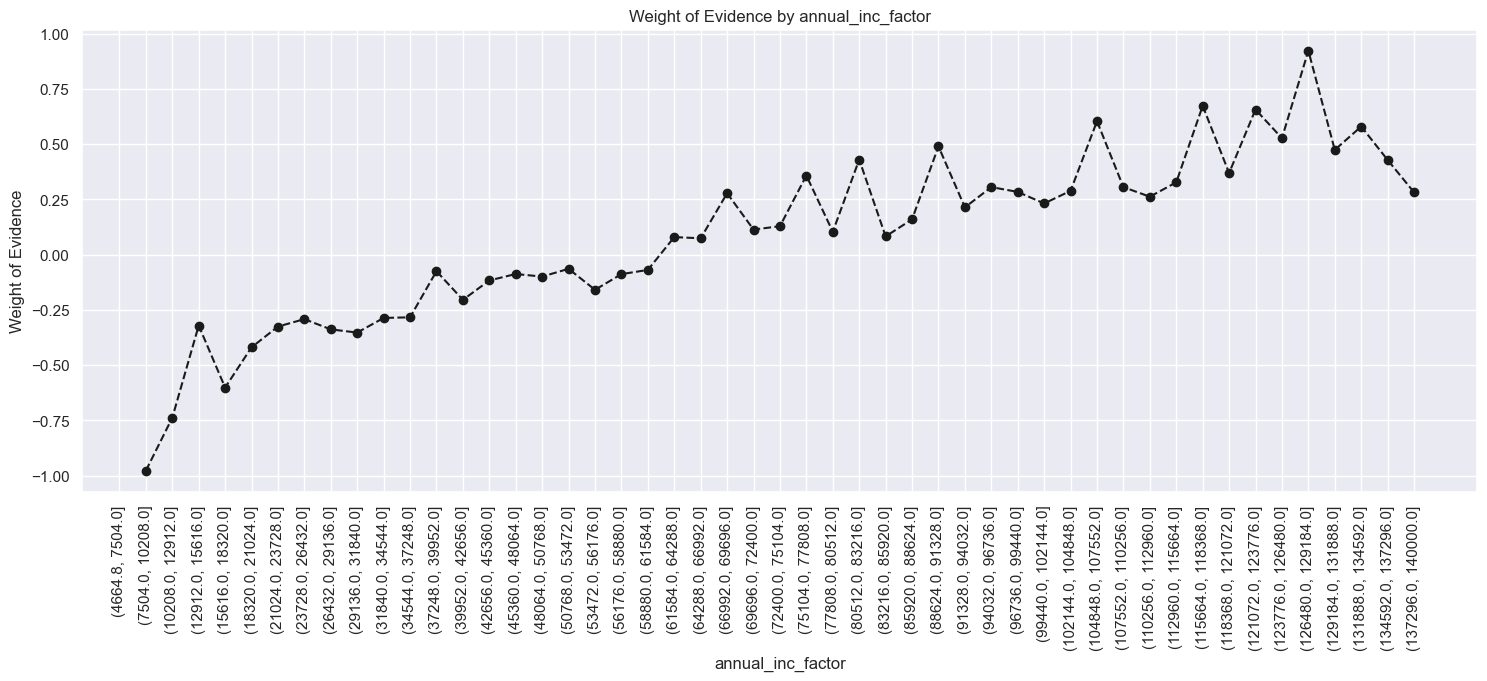

In [556]:
plot_by_woe(df_temp, 90)

In [557]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [558]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_10429/731008171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.890208    0.031283  1200.0  148.0   
1                     (3.4, 6.8]   1890   0.898942    0.043861  1699.0  191.0   
2                    (6.8, 10.2]   3373   0.903647    0.078276  3048.0  325.0   
3                   (10.2, 13.6]   2496   0.909455    0.057924  2270.0  226.0   
4                   (13.6, 17.0]   3165   0.903949    0.073449  2861.0  304.0   
5                   (17.0, 20.4]   2282   0.904470    0.052958  2064.0  218.0   
6                   (20.4, 23.8]   2115   0.909693    0.049082  1924.0  191.0   
7                   (23.8, 27.2]   2755   0.905626    0.063934  2495.0  260.0   
8                   (27.2, 30.6]   1929   0.906169    0.044766  1748.0  181.0   
9                   (30.6, 34.0]   2453   0.907460    0.056926  2226.0  227.0   
10                  (34.0, 37.4]   1786   0.916013    0.041447  1636.0  150.0   
11                  (37.4, 40.8]   1765   0.906516    0.040960  1600.0  165.0   
12                  (40.8, 44.2]   2270   0.887665    0.052679  2015.0  255.0   
13                  (44.2, 47.6]   1664   0.910457    0.038616  1515.0  149.0   
14                  (47.6, 51.0]   1739   0.898792    0.040356  1563.0  176.0   
15                  (51.0, 54.4]   1158   0.896373    0.026873  1038.0  120.0   
16                  (54.4, 57.8]   1130   0.921239    0.026224  1041.0   89.0   
17                  (57.8, 61.2]   1423   0.910049    0.033023  1295.0  128.0   
18                  (61.2, 64.6]   1015   0.903448    0.023555   917.0   98.0   
19                  (64.6, 68.0]   1342   0.904620    0.031143  1214.0  128.0   
20                  (68.0, 71.4]    930   0.898925    0.021582   836.0   94.0   
21                  (71.4, 74.8]    928   0.903017    0.021536   838.0   90.0   
22                  (74.8, 78.2]   1195   0.917992    0.027732  1097.0   98.0   
23                  (78.2, 81.6]    768   0.891927    0.017823   685.0   83.0   
24                  (81.6, 85.0]    136   0.897059    0.003156   122.0   14.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

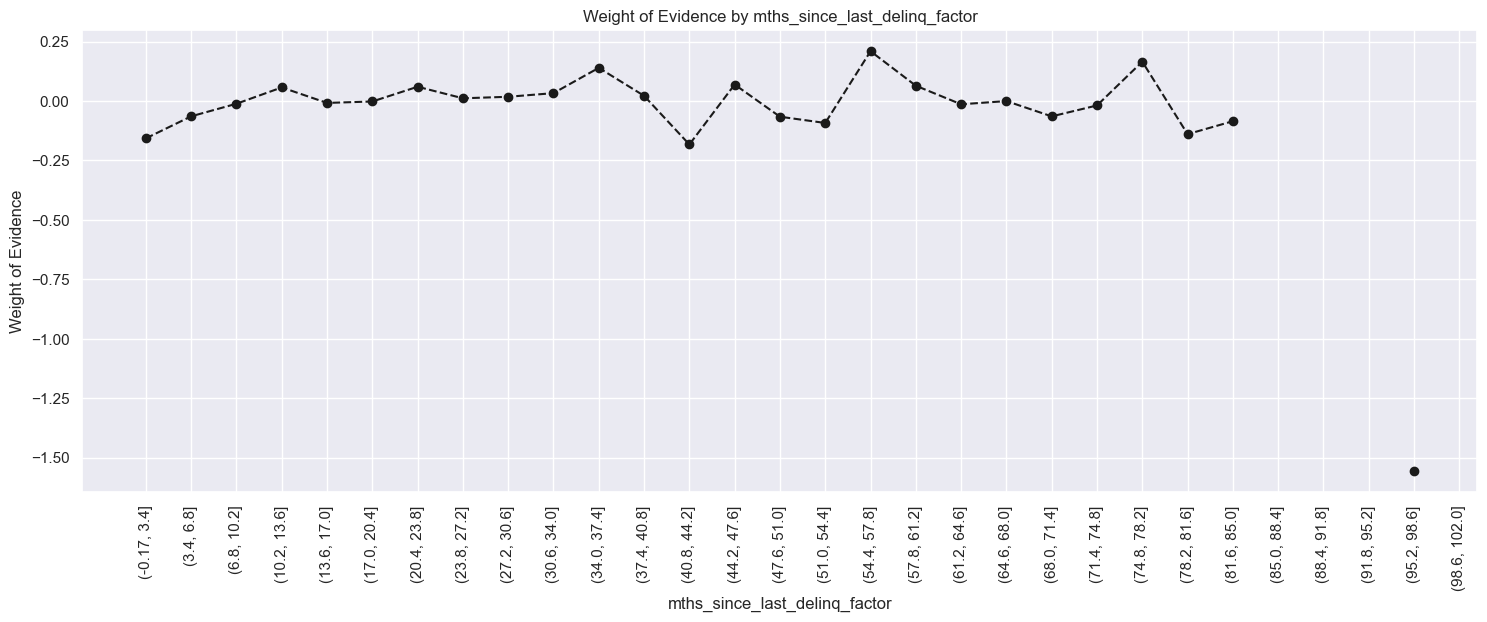

In [559]:
plot_by_woe(df_temp, 90)

In [560]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [561]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    187   0.903743    0.002005   169.0   18.0   
1         (0.4, 0.8]    184   0.885870    0.001973   163.0   21.0   
2         (0.8, 1.2]    223   0.905830    0.002391   202.0   21.0   
3         (1.2, 1.6]    255   0.913725    0.002734   233.0   22.0   
4         (1.6, 2.0]    315   0.901587    0.003378   284.0   31.0   
5       (2.0, 2.399]    324   0.916667    0.003474   297.0   27.0   
6     (2.399, 2.799]    366   0.920765    0.003925   337.0   29.0   
7     (2.799, 3.199]    442   0.911765    0.004740   403.0   39.0   
8     (3.199, 3.599]    484   0.944215    0.005190   457.0   27.0   
9     (3.599, 3.999]    563   0.904085    0.006037   509.0   54.0   
10    (3.999, 4.399]    599   0.926544    0.006423   555.0   44.0   
11    (4.399, 4.799]    661   0.915280    0.007088   605.0   56.0   
12    (4.799, 5.199]    706   0.926346    0.007570   654.0   52.0   
13    (5.199, 5.599]    821   0.919610    0.008804   755.0   66.0   
14    (5.599, 5.999]    841   0.915577    0.009018   770.0   71.0   
15    (5.999, 6.398]    889   0.922385    0.009533   820.0   69.0   
16    (6.398, 6.798]    978   0.943763    0.010487   923.0   55.0   
17    (6.798, 7.198]   1021   0.918707    0.010948   938.0   83.0   
18    (7.198, 7.598]   1057   0.914853    0.011334   967.0   90.0   
19    (7.598, 7.998]   1170   0.927350    0.012546  1085.0   85.0   
20    (7.998, 8.398]   1172   0.918942    0.012567  1077.0   95.0   
21    (8.398, 8.798]   1127   0.921029    0.012085  1038.0   89.0   
22    (8.798, 9.198]   1281   0.927400    0.013736  1188.0   93.0   
23    (9.198, 9.598]   1309   0.909091    0.014036  1190.0  119.0   
24    (9.598, 9.998]   1371   0.919037    0.014701  1260.0  111.0   
25   (9.998, 10.397]   1429   0.923023    0.015323  1319.0  110.0   
26  (10.397, 10.797]   1521   0.911243    0.016310  1386.0  135.0   
27  (10.797, 11.197]   1555   0.920900    0.016674  1432.0  123.0   
28  (11.197, 11.597]   1597   0.909831    0.017125  1453.0  144.0   
29  (11.597, 11.997]   1554   0.917632    0.016664  1426.0  128.0   
30  (11.997, 12.397]   1607   0.907281    0.017232  1458.0  149.0   
31  (12.397, 12.797]   1719   0.920884    0.018433  1583.0  136.0   
32  (12.797, 13.197]   1614   0.926270    0.017307  1495.0  119.0   
33  (13.197, 13.597]   1717   0.913803    0.018411  1569.0  148.0   
34  (13.597, 13.997]   1707   0.899824    0.018304  1536.0  171.0   
35  (13.997, 14.396]   1724   0.911253    0.018487  1571.0  153.0   
36  (14.396, 14.796]   1773   0.906937    0.019012  1608.0  165.0   
37  (14.796, 15.196]   1755   0.905413    0.018819  1589.0  166.0   
38  (15.196, 15.596]   1695   0.909145    0.018176  1541.0  154.0   
39  (15.596, 15.996]   1752   0.916667    0.018787  1606.0  146.0   
40  (15.996, 16.396]   1653   0.909861    0.017725  1504.0  149.0   
41  (16.396, 16.796]   1689   0.908822    0.018111  1535.0  154.0   
42  (16.796, 17.196]   1770   0.909605    0.018980  1610.0  160.0   
43  (17.196, 17.596]   1708   0.894028    0.018315  1527.0  181.0   
44  (17.596, 17.996]   1680   0.908929    0.018015  1527.0  153.0   
45  (17.996, 18.395]   1671   0.910233    0.017918  1521.0  150.0   
46  (18.395, 18.795]   1638   0.910867    0.017564  1492.0  146.0   
47  (18.795, 19.195]   1628   0.896192    0.017457  1459.0  169.0   
48  (19.195, 19.595]   1606   0.902242    0.017221  1449.0  157.0   
49  (19.595, 19.995]   1603   0.891454    0.017189  1429.0  174.0   
50  (19.995, 20.395]   1512   0.901455    0.016213  1363.0  149.0   
51  (20.395, 20.795]   1656   0.892512    0.017757  1478.0  178.0   
52  (20.795, 21.195]   1505   0.899668    0.016138  1354.0  151.0   
53  (21.195, 21.595]   1455   0.892096    0.015602  1298.0  157.0   
54  (21.595, 21.995]   1452   0.894628    0.015570  1299.0  153.0   
55  (21.995, 22.394]   1394   0.882353    0.014948  1230.0  164.0   
56  (22.394, 22.794]   1309   0.872422    0.014036  1142.0  167.0   
57  (22.

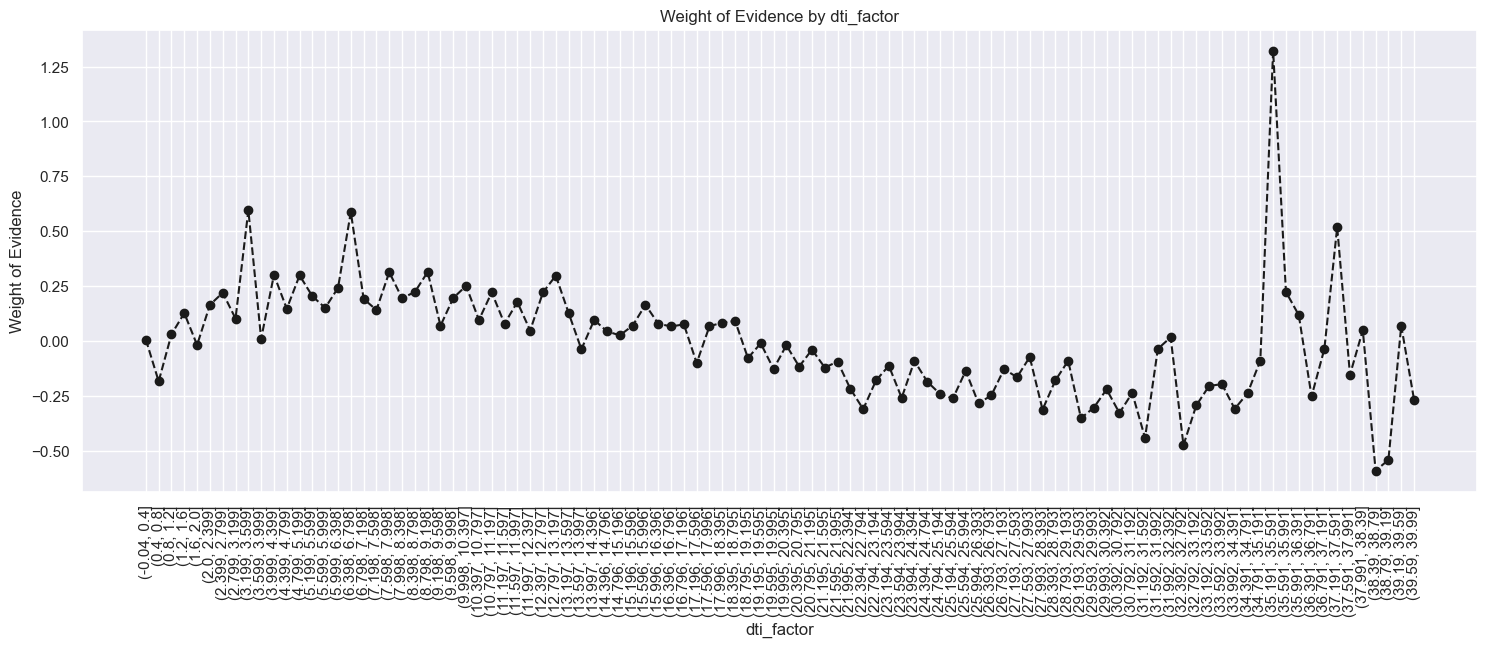

In [562]:
plot_by_woe(df_temp, 90)

In [563]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [564]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_10429/1775951206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    328   0.893293    0.003544   293.0   35.0     0.003505   
1      (0.7, 1.4]    393   0.916031    0.004246   360.0   33.0     0.004307   
2      (1.4, 2.1]    536   0.901119    0.005792   483.0   53.0     0.005778   
3      (2.1, 2.8]    607   0.919275    0.006559   558.0   49.0     0.006676   
4      (2.8, 3.5]    811   0.933416    0.008763   757.0   54.0     0.009056   
5      (3.5, 4.2]    970   0.907216    0.010481   880.0   90.0     0.010528   
6      (4.2, 4.9]   1140   0.921053    0.012318  1050.0   90.0     0.012562   
7      (4.9, 5.6]   1370   0.921168    0.014803  1262.0  108.0     0.015098   
8      (5.6, 6.3]   1491   0.919517    0.016111  1371.0  120.0     0.016402   
9      (6.3, 7.0]   1722   0.934959    0.018607  1610.0  112.0     0.019261   
10     (7.0, 7.7]   1846   0.916576    0.019946  1692.0  154.0     0.020242   
11     (7.7, 8.4]   2044   0.923190    0.022086  1887.0  157.0     0.022575   
12     (8.4, 9.1]   2097   0.922747    0.022659  1935.0  162.0     0.023149   
13     (9.1, 9.8]   2319   0.915912    0.025057  2124.0  195.0     0.025410   
14    (9.8, 10.5]   2519   0.918618    0.027218  2314.0  205.0     0.027683   
15   (10.5, 11.2]   2694   0.917966    0.029109  2473.0  221.0     0.029586   
16   (11.2, 11.9]   2748   0.913028    0.029693  2509.0  239.0     0.030016   
17   (11.9, 12.6]   2844   0.913502    0.030730  2598.0  246.0     0.031081   
18   (12.6, 13.3]   2886   0.920305    0.031184  2656.0  230.0     0.031775   
19   (13.3, 14.0]   3056   0.908050    0.033021  2775.0  281.0     0.033199   
20   (14.0, 14.7]   3068   0.907432    0.033150  2784.0  284.0     0.033306   
21   (14.7, 15.4]   2954   0.907921    0.031919  2682.0  272.0     0.032086   
22   (15.4, 16.1]   3050   0.916066    0.032956  2794.0  256.0     0.033426   
23   (16.1, 16.8]   2914   0.907001    0.031486  2643.0  271.0     0.031619   
24   (16.8, 17.5]   3078   0.898635    0.033258  2766.0  312.0     0.033091   
25   (17.5, 18.2]   2964   0.912618    0.032027  2705.0  259.0     0.032361   
26   (18.2, 18.9]   2863   0.904645    0.030935  2590.0  273.0     0.030985   
27   (18.9, 19.6]   2796   0.902718    0.030211  2524.0  272.0     0.030196   
28   (19.6, 20.3]   2772   0.898990    0.029952  2492.0  280.0     0.029813   
29   (20.3, 21.0]   2830   0.892933    0.030579  2527.0  303.0     0.030232   
30   (21.0, 21.7]   2517   0.896702    0.027197  2257.0  260.0     0.027001   
31   (21.7, 22.4]   2495   0.884168    0.026959  2206.0  289.0     0.026391   
32   (22.4, 23.1]   2261   0.877046    0.024431  1983.0  278.0     0.023724   
33   (23.1, 23.8]   2327   0.889987    0.025144  2071.0  256.0     0.024776   
34   (23.8, 24.5]   2127   0.887635    0.022983  1888.0  239.0     0.022587   
35   (24.5, 25.2]   1929   0.884396    0.020843  1706.0  223.0     0.020410   
36   (25.2, 25.9]   1707   0.882835    0.018444  1507.0  200.0     0.018029   
37   (25.9, 26.6]   1657   0.875075    0.017904  1450.0  207.0     0.017347   
38   (26.6, 27.3]   1553   0.891178    0.016780  1384.0  169.0     0.016557   
39   (27.3, 28.0]   1559   0.892880    0.016845  1392.0  167.0     0.016653   
40   (28.0, 28.7]   1390   0.878417    0.015019  1221.0  169.0     0.014607   
41   (28.7, 29.4]   1341   0.884415    0.014490  1186.0  155.0     0.014189   
42   (29.4, 30.1]   1147   0.870968    0.012394   999.0  148.0     0.011951   
43   (30.1, 30.8]    838   0.877088    0.009055   735.0  103.0     0.008793   
44   (30.8, 31.5]    798   0.874687    0.008623   698.0  100.0     0.008350   
45   (31.5, 32.2]    734   0.897820    0.007931   659.0   75.0     0.007884   
46   (32.2, 32.9]    696   0.870690    0.007520   606.0   90.0     0.007250   
47   (32.9, 33.6]    621   0.872786    0.006710   542.0   79.0     0.006484   
48   (33.6, 34.3]    634   0.881703    0.006850   559.0   75.0     0.006688   
49   (34.3, 35.0]    507   0.877712    0.005478   445.0  

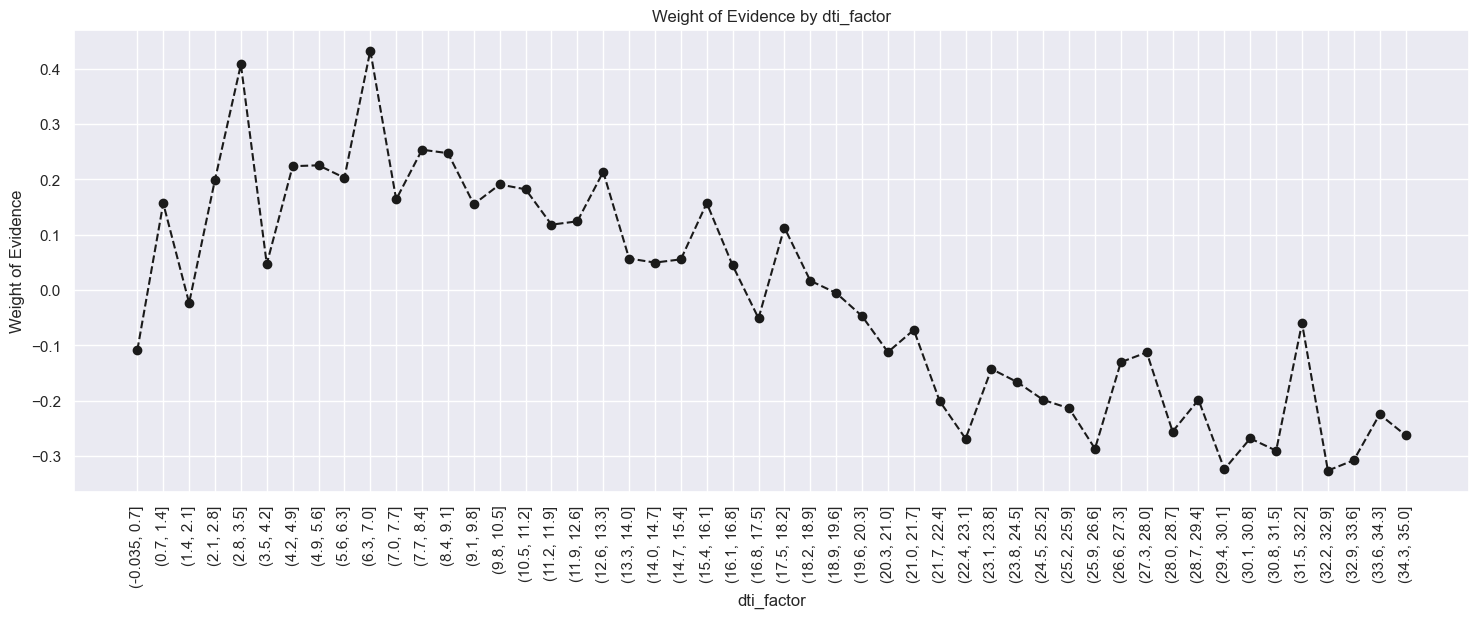

In [565]:
plot_by_woe(df_temp, 90)

In [566]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [567]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/var/folders/sw/82v_k3d51w1fxjcjjhjg0blc0000gn/T/ipykernel_10429/2174144996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
/Users/mang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.741803    0.019410   181.0   63.0   
1                   (2.58, 5.16]     36   0.944444    0.002864    34.0    2.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.924242    0.005250    61.0    5.0   
4                  (10.32, 12.9]     42   0.904762    0.003341    38.0    4.0   
5                  (12.9, 15.48]     69   0.898551    0.005489    62.0    7.0   
6                 (15.48, 18.06]     95   0.873684    0.007557    83.0   12.0   
7                 (18.06, 20.64]     58   0.982759    0.004614    57.0    1.0   
8                 (20.64, 23.22]    101   0.900990    0.008034    91.0   10.0   
9                  (23.22, 25.8]     94   0.968085    0.007478    91.0    3.0   
10                 (25.8, 28.38]    135   0.933333    0.010739   126.0    9.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.933673    0.015591   183.0   13.0   
13                (33.54, 36.12]    195   0.933333    0.015512   182.0   13.0   
14                 (36.12, 38.7]    166   0.927711    0.013205   154.0   12.0   
15                 (38.7, 41.28]    234   0.914530    0.018614   214.0   20.0   
16                (41.28, 43.86]    194   0.907216    0.015432   176.0   18.0   
17                (43.86, 46.44]    328   0.932927    0.026092   306.0   22.0   
18                (46.44, 49.02]    367   0.923706    0.029194   339.0   28.0   
19                 (49.02, 51.6]    231   0.956710    0.018376   221.0   10.0   
20                 (51.6, 54.18]    447   0.932886    0.035558   417.0   30.0   
21                (54.18, 56.76]    264   0.924242    0.021001   244.0   20.0   
22                (56.76, 59.34]    393   0.941476    0.031262   370.0   23.0   
23                (59.34, 61.92]    287   0.930314    0.022830   267.0   20.0   
24                 (61.92, 64.5]    405   0.938272    0.032217   380.0   25.0   
25                 (64.5, 67.08]    394   0.964467    0.031342   380.0   14.0   
26                (67.08, 69.66]    272   0.900735    0.021637   245.0   27.0   
27                (69.66, 72.24]    366   0.915301    0.029115   335.0   31.0   
28                (72.24, 74.82]    231   0.926407    0.018376   214.0   17.0   
29                 (74.82, 77.4]    350   0.934286    0.027842   327.0   23.0   
30                 (77.4, 79.98]    228   0.899123    0.018137   205.0   23.0   
31                (79.98, 82.56]    355   0.912676    0.028240   324.0   31.0   
32                (82.56, 85.14]    288   0.944444    0.022910   272.0   16.0   
33                (85.14, 87.72]    251   0.844622    0.019967   212.0   39.0   
34                 (87.72, 90.3]    345   0.895652    0.027444   309.0   36.0   
35                 (90.3, 92.88]    249   0.851406    0.019807   212.0   37.0   
36                (92.88, 95.46]    385   0.870130    0.030626   335.0   50.0   
37                (95.46, 98.04]    401   0.887781    0.031899   356.0   45.0   
38               (98.04, 100.62]    327   0.889908    0.026012   291.0   36.0   
39               (100.62, 103.2]    526   0.893536    0.041842   470.0   56.0   
40               (103.2, 105.78]    396   0.909091    0.031501   360.0   36.0   
41              (105.78, 108.36]    565   0.916814    0.044945   518.0   47.0   
42              (108.36, 110.94]    407   0.936118    0.032376   381.0   26.0   
43              (110.94, 113.52]    524   0.898855    0.041683   471.0   53.0   
44               (113.52, 116.1]    515   0.920388    0.040967   474.0   41.0   
45               (116.1, 118.68]    314   0.898089    0.024978   282.0   32.0   
46              (118.68, 121.26]     92   0.858696    0.007318    79.0   13.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

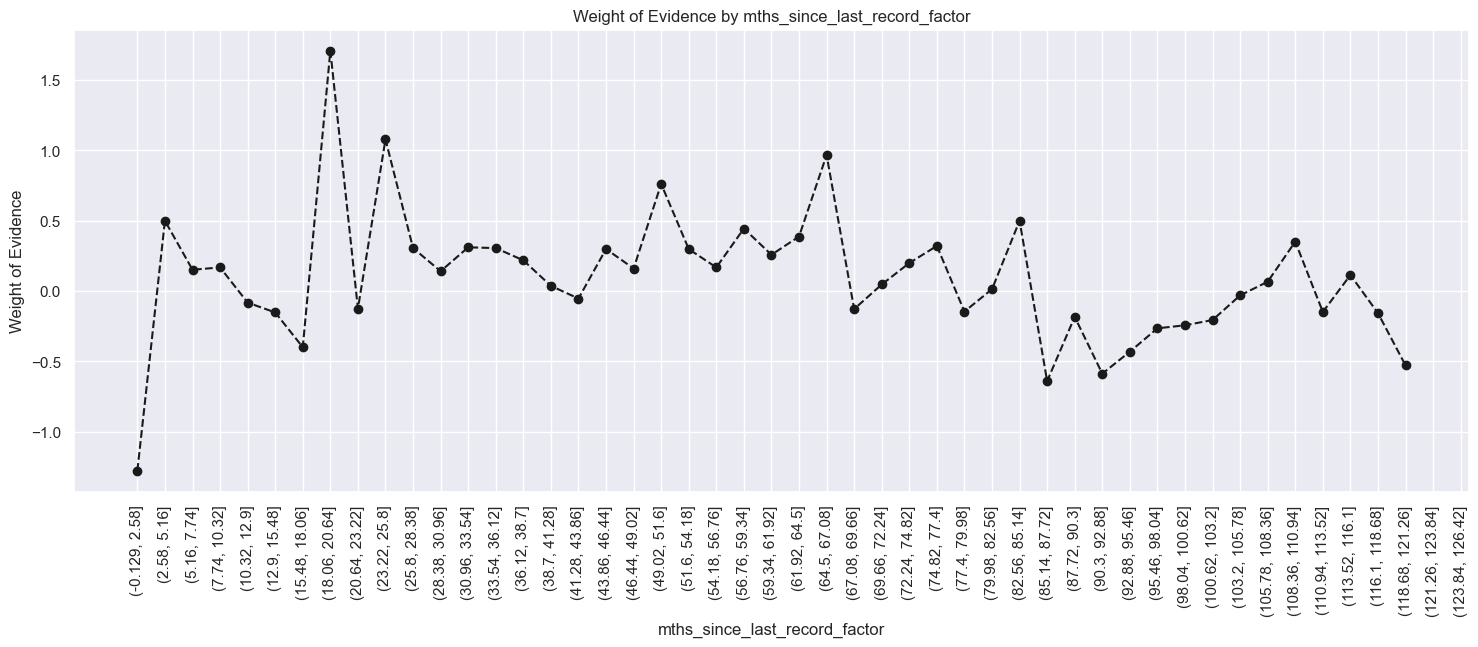

In [568]:
plot_by_woe(df_temp, 90)

In [569]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [570]:
# loan_data_inputs_train = df_inputs_prepr

### Preprocessing the Test Dataset

In [571]:
loan_data_inputs_test = df_inputs_prepr

In [572]:
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
# loan_data_targets_train.to_csv('loan_data_targets_train.csv')

In [573]:
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')